# P4 - Anticipez les besoins en consommation électrique de bâtiments

## P4_Nettoyage et exploration jeu de données

In [252]:
# librairies

In [1252]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import missingno as msno

In [1253]:
# chargement jeux de données

In [1254]:
# Chargement du jeu de données 2015
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=',')


In [1255]:
# dimension data_2015
data_2015.shape

(3340, 47)

In [1256]:
# Chargement du jeu de données 2016
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=',')

In [1257]:
# dimension data-2016
data_2016.shape

(3376, 46)

### description data_2015

In [1258]:
# contenu des 2 premieres lignes
data_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [1259]:
# intitulés des colonnes
data_2015.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

In [1260]:
# transformer toutes les colonnes en minuscule
data_2015.columns = data_2015.columns.astype(str).str.lower()

<AxesSubplot:>

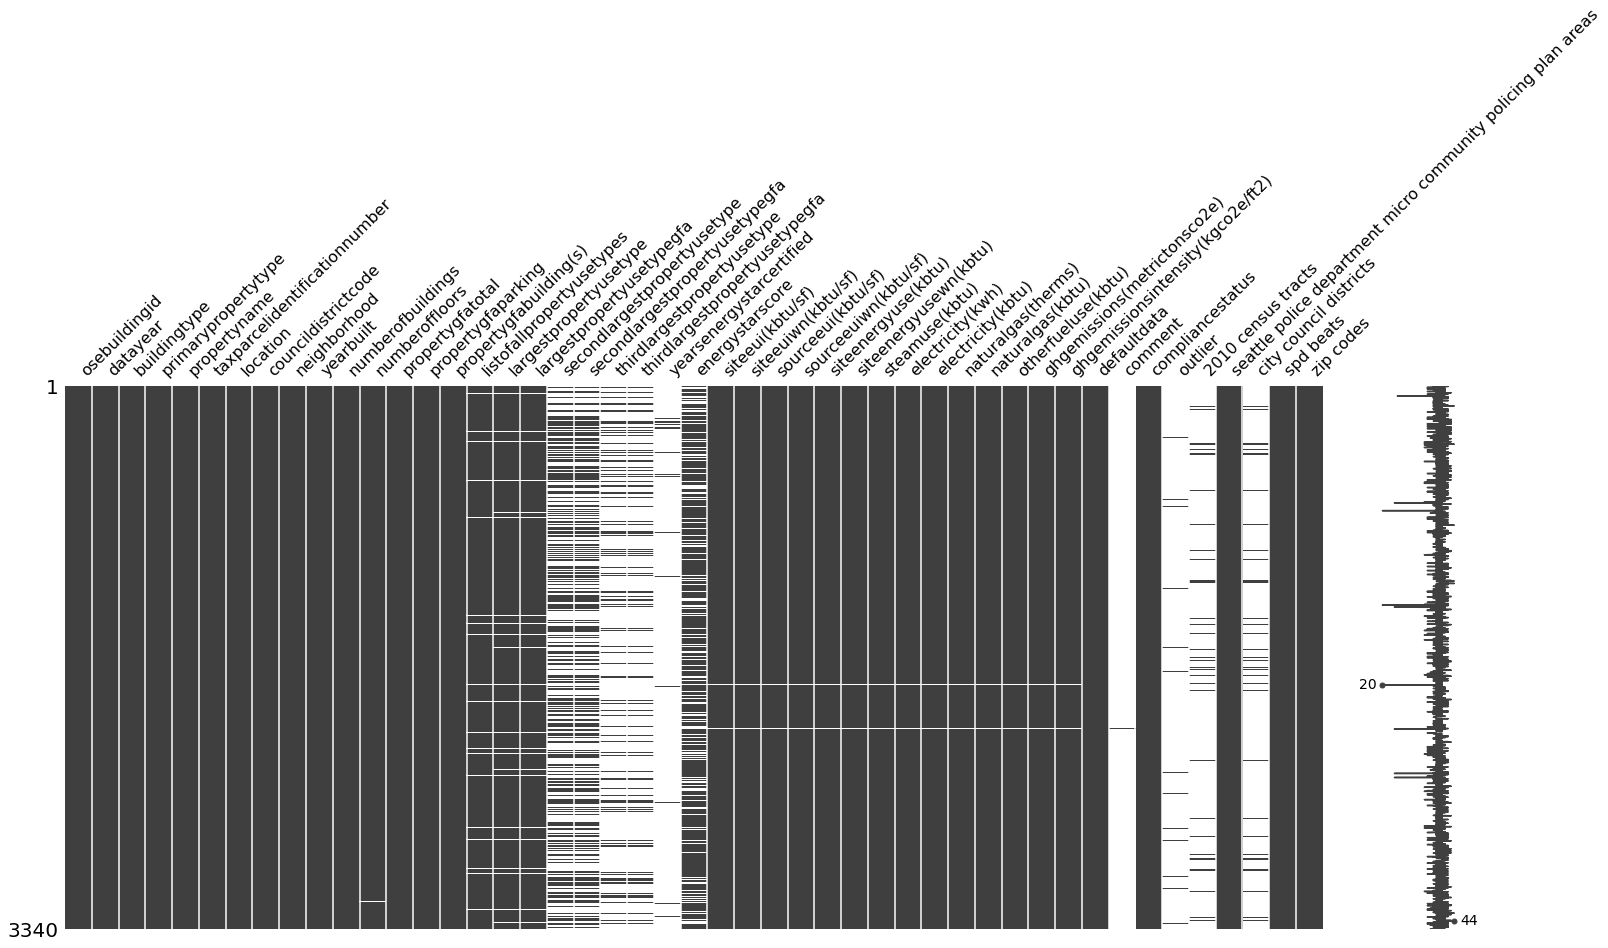

In [1261]:
# visualisation remplissage data_2015
msno.matrix(data_2015)

In [1262]:
# % valeurs manquantes

In [1263]:
data_2015.isnull().mean()*100

osebuildingid                                                     0.000000
datayear                                                          0.000000
buildingtype                                                      0.000000
primarypropertytype                                               0.000000
propertyname                                                      0.000000
taxparcelidentificationnumber                                     0.059880
location                                                          0.000000
councildistrictcode                                               0.000000
neighborhood                                                      0.000000
yearbuilt                                                         0.000000
numberofbuildings                                                 0.000000
numberoffloors                                                    0.239521
propertygfatotal                                                  0.000000
propertygfaparking       

In [1264]:
# types variables

In [1265]:
data_2015.dtypes

osebuildingid                                                      int64
datayear                                                           int64
buildingtype                                                      object
primarypropertytype                                               object
propertyname                                                      object
taxparcelidentificationnumber                                     object
location                                                          object
councildistrictcode                                                int64
neighborhood                                                      object
yearbuilt                                                          int64
numberofbuildings                                                  int64
numberoffloors                                                   float64
propertygfatotal                                                   int64
propertygfaparking                                 

In [1266]:
# statistiques descriptifs variables quanti

In [1267]:
data_2015.describe()

,osebuildingid,datayear,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,...,naturalgas(therms),naturalgas(kbtu),otherfueluse(kbtu),ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),2010 census tracts,seattle police department micro community policing plan areas,city council districts,spd beats,zip codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [1268]:
# statistiques descriptifs variables quali

In [1269]:
data_2015.describe(exclude=[np.number])

,buildingtype,primarypropertytype,propertyname,taxparcelidentificationnumber,location,neighborhood,listofallpropertyusetypes,largestpropertyusetype,secondlargestpropertyusetype,thirdlargestpropertyusetype,yearsenergystarcertified,defaultdata,comment,compliancestatus,outlier
count,3340,3340,3340,3338,3340,3340,3213,3204,1559,560,110,3339,13,3340,84
unique,7,27,3287,3245,3298,13,442,56,47,41,61,2,13,2,2
top,NonResidential,Low-Rise Multifamily,WAREHOUSE,925049346,"{'latitude': '47.52593209', 'longitude': '-122...",DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,No,Under construction starting 6/2013 (old buildi...,Compliant,High Outlier
freq,1461,998,9,5,5,578,862,1598,881,107,20,2791,1,3337,46


### description data_2016

In [1270]:
# contenu des 2 premières lignes
data_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [1271]:
# dimension
data_2016.shape

(3376, 46)

In [1272]:
# intitulés des colonnes data_2016
data_2016.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [1273]:
# transformer les colonnes en minuscules
data_2016.columns = data_2016.columns.astype(str).str.lower()

<AxesSubplot:>

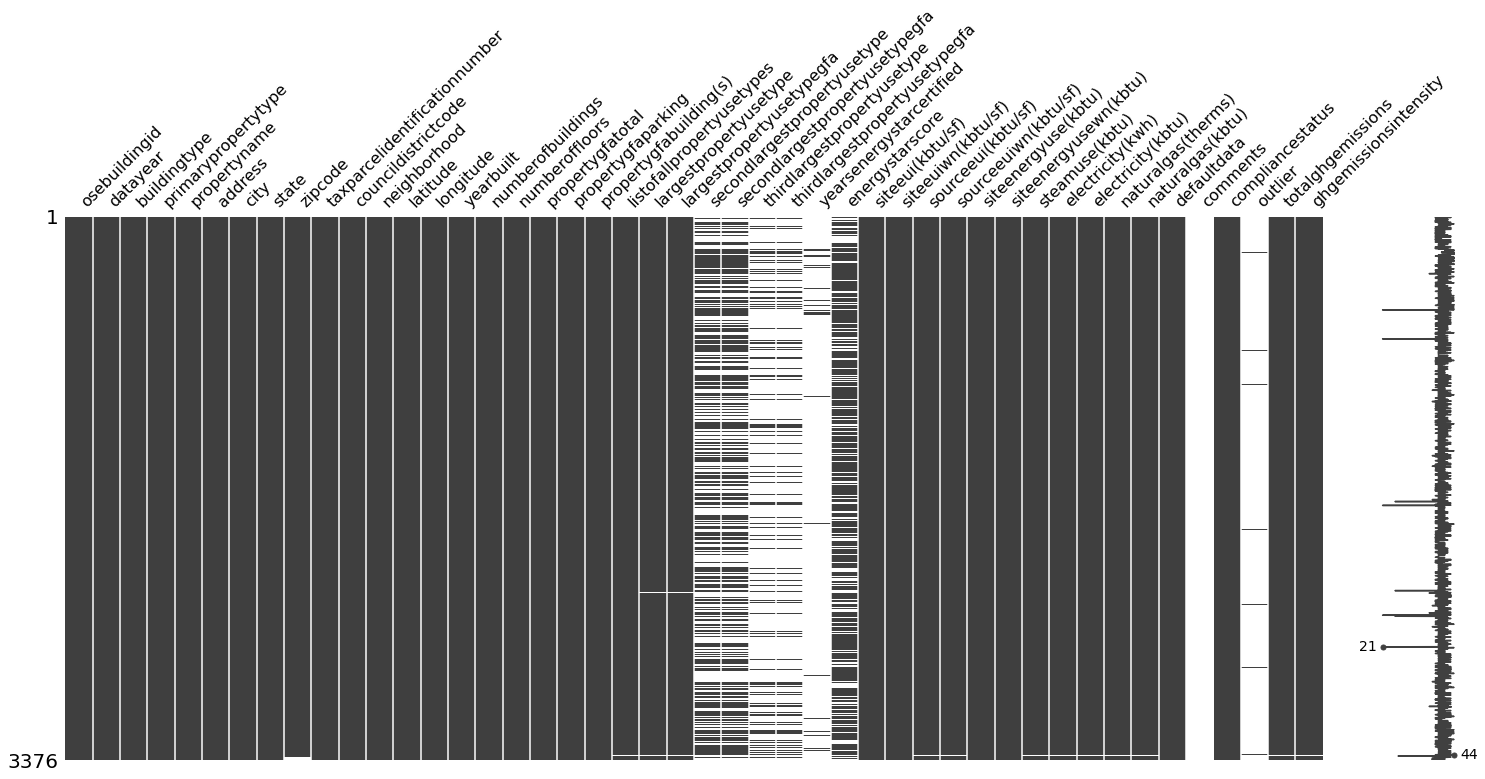

In [1274]:
# visualisation remplissage data_2016
msno.matrix(data_2016)

In [1275]:
# % valeurs manquantes

In [1276]:
data_2016.isnull().mean()*100

osebuildingid                        0.000000
datayear                             0.000000
buildingtype                         0.000000
primarypropertytype                  0.000000
propertyname                         0.000000
address                              0.000000
city                                 0.000000
state                                0.000000
zipcode                              0.473934
taxparcelidentificationnumber        0.000000
councildistrictcode                  0.000000
neighborhood                         0.000000
latitude                             0.000000
longitude                            0.000000
yearbuilt                            0.000000
numberofbuildings                    0.236967
numberoffloors                       0.000000
propertygfatotal                     0.000000
propertygfaparking                   0.000000
propertygfabuilding(s)               0.000000
listofallpropertyusetypes            0.266588
largestpropertyusetype            

In [1277]:
# types variables

In [1278]:
data_2016.dtypes

osebuildingid                        int64
datayear                             int64
buildingtype                        object
primarypropertytype                 object
propertyname                        object
address                             object
city                                object
state                               object
zipcode                            float64
taxparcelidentificationnumber       object
councildistrictcode                  int64
neighborhood                        object
latitude                           float64
longitude                          float64
yearbuilt                            int64
numberofbuildings                  float64
numberoffloors                       int64
propertygfatotal                     int64
propertygfaparking                   int64
propertygfabuilding(s)               int64
listofallpropertyusetypes           object
largestpropertyusetype              object
largestpropertyusetypegfa          float64
secondlarge

In [1279]:
# statistiques descriptives variables quanti

In [1280]:
data_2016.describe()

,osebuildingid,datayear,zipcode,councildistrictcode,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),comments,totalghgemissions,ghgemissionsintensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [1281]:
# statistiques descriptives variables quali

In [1282]:
data_2016.describe(exclude=[np.number])

,buildingtype,primarypropertytype,propertyname,address,city,state,taxparcelidentificationnumber,neighborhood,listofallpropertyusetypes,largestpropertyusetype,secondlargestpropertyusetype,thirdlargestpropertyusetype,yearsenergystarcertified,defaultdata,compliancestatus,outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3367,3356,1679,596,119,3376,3376,32
unique,8,24,3362,3354,1,1,3268,19,466,56,50,44,65,2,4,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,1625049001,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,False,Compliant,Low outlier
freq,1460,987,3,4,3376,3376,8,573,866,1667,976,110,14,3263,3211,23


In [1283]:
# focus sur les differences entre colonnes

In [1284]:
cols_2015=data_2015.columns.tolist()
cols_2016=data_2016.columns.tolist()


In [1285]:
#colonnes en plus en 2016
set(cols_2016)-set(cols_2015)

{'address',
 'city',
 'comments',
 'ghgemissionsintensity',
 'latitude',
 'longitude',
 'state',
 'totalghgemissions',
 'zipcode'}

In [1286]:
#colonnes en plus en 2015
set(cols_2015)-set(cols_2016)

{'2010 census tracts',
 'city council districts',
 'comment',
 'ghgemissions(metrictonsco2e)',
 'ghgemissionsintensity(kgco2e/ft2)',
 'location',
 'otherfueluse(kbtu)',
 'seattle police department micro community policing plan areas',
 'spd beats',
 'zip codes'}

In [1287]:
# contenus des variables en surplus de 2015 et 2016

In [1288]:
data_2016[['address',
 'city',
 'comments',
 'ghgemissionsintensity',
 'latitude',
 'longitude',
 'state',
 'totalghgemissions',
 'zipcode']].sample (3)

,address,city,comments,ghgemissionsintensity,latitude,longitude,state,totalghgemissions,zipcode
301,1904 Third Avenue,Seattle,NaN,1.62,47.61229,-122.33903,WA,418.90,98101.0
3065,601-619 S. Snoqualmie Street,Seattle,NaN,2.40,47.56160,-122.32603,WA,67.96,98108.0
1188,811 N 130th,Seattle,NaN,0.15,47.72305,-122.34878,WA,4.76,98133.0


In [1289]:
data_2015[['2010 census tracts',
 'city council districts',
 'comment',
 'ghgemissions(metrictonsco2e)',
 'ghgemissionsintensity(kgco2e/ft2)',
 'location',
 'otherfueluse(kbtu)',
 'seattle police department micro community policing plan areas',
 'spd beats',
 'zip codes']].sample(3)

,2010 census tracts,city council districts,comment,ghgemissions(metrictonsco2e),ghgemissionsintensity(kgco2e/ft2),location,otherfueluse(kbtu),seattle police department micro community policing plan areas,spd beats,zip codes
406,NaN,NaN,NaN,11.09,0.06,"{'latitude': '47.62145274', 'longitude': '-122...",0.0,56.0,10.0,18390
2727,NaN,NaN,NaN,43.86,1.02,"{'latitude': '47.66529949', 'longitude': '-122...",0.0,60.0,47.0,18383
2315,125.0,1.0,NaN,16.71,0.57,"{'latitude': '47.71355779', 'longitude': '-122...",0.0,6.0,32.0,19582


In [1290]:
data_2015['location'][1]

'{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [1291]:
# importer AST

In [1292]:
import ast
from ast import literal_eval

In [1293]:
# latitude
data_2015['latitude'] = [ast.literal_eval(row)['latitude'] for row in data_2015['location']]

In [1294]:
#longitude
data_2015['longitude'] = [ast.literal_eval(row)['longitude'] for row in data_2015['location']]

In [1295]:
#adress
data_2015['address'] = [ast.literal_eval(ast.literal_eval(row)['human_address'])['address'] for row in data_2015['location']]

In [1296]:
#city
data_2015['city'] = [ast.literal_eval(ast.literal_eval(row)['human_address'])['city'] for row in data_2015['location']]

In [1297]:
# State
data_2015['state'] = [ast.literal_eval(ast.literal_eval(row)['human_address'])['state'] for row in data_2015['location']]

In [1298]:
#ZipCode
data_2015['zipcode'] = [ast.literal_eval(ast.literal_eval(row)['human_address'])['zip'] for row in data_2015['location']]

In [1299]:
# drop location
data_2015.drop(['location'], axis=1, inplace=True)

In [1300]:
# renommer Comments en data_2015
data_2015.rename(columns={'comment': 'comments'}, inplace=True)

In [1301]:
# drop colonne ZipCodes
data_2015.drop(['zip codes'], axis=1, inplace=True)

In [1302]:
#Renomme la variable 'GHGEmissionsIntensity(kgCO2e/ft2)' en 'TotalGHGEmissions'
data_2015.rename(columns={'ghgemissionsintensity(kgco2e/ft2)': 'ghgemissionsintensity'}, inplace=True)

In [1303]:
# verification GHGEmissions(MetricTonsCO2e) = TotalGHGEmissions ?
data_2015['ghgemissions(metrictonsco2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: ghgemissions(metrictonsco2e), dtype: float64

In [1304]:
data_2016['totalghgemissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: totalghgemissions, dtype: float64

In [1305]:
# Renomme la variable ghgemissions(metrictonsco2e) en totalghgemissions
data_2015.rename(columns={'ghgemissions(metrictonsco2e)': 'totalghgemissions'}, inplace=True)

In [1306]:
# SPD Beats
data_2015['spd beats'].unique()

array([31.,  7., 19., 20., 43., 38., 12., 10.,  6., 29., 39.,  3., 48.,
       37., 27.,  1., 41., 25.,  9., 24., 30., 40., 17., 50., 32., 51.,
       13., 42., 47., 33.,  2., 22., 11., 46.,  8., 44., 16., 23., 28.,
       34., 45., 21., 36., 14., 18., 49., 15., 26., 35.,  5.,  4., nan])

In [1307]:
# supprimer spd beats
data_2015.drop(['spd beats'], axis=1, inplace=True)

In [1308]:
# city council districts
data_2015['city council districts'].unique()

array([nan,  1.,  2.])

In [1309]:
# supprimer city council districts
data_2015.drop(['city council districts'], axis=1, inplace=True)

In [1310]:
# otherfueluse(kbtu) 
data_2015['otherfueluse(kbtu)'].unique()

array([0.000000e+00,          nan, 6.464408e+06, 1.778490e+05,
       8.269669e+06, 3.379520e+05, 2.944419e+06, 2.304567e+06,
       1.552700e+04, 5.470000e+02, 1.255100e+04, 1.943011e+06,
       4.279380e+05, 1.459440e+05, 2.299420e+05, 5.596000e+03,
       1.431340e+05, 1.780940e+05, 1.827150e+05])

In [1311]:
# Donnée que nous décidons de supprimer
data_2015.drop(['otherfueluse(kbtu)'],axis=1,inplace=True)


In [1312]:
# 2010 census tracts
data_2015['2010 census tracts'].unique()

array([ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119.,
       118., 122., 125.])

In [1313]:
# drop 2010 census tracts
data_2015.drop(['2010 census tracts'], axis=1, inplace=True)

In [1314]:
# drop Seattle Police Department Micro Community Policing Plan Areas
data_2015.drop(['seattle police department micro community policing plan areas'],axis=1,inplace=True)

In [1315]:
# verification colonnes 2015/2016
cols_2015=data_2015.columns.tolist()
cols_2016=data_2016.columns.tolist()
set(cols_2016)-set(cols_2015)

set()

In [1316]:
set(cols_2015)-set(cols_2016)

set()

In [1317]:
# concatener data_2015 et 2016 

In [1318]:
data = pd.concat([data_2015, data_2016],axis=0)

In [1319]:
data.shape

(6716, 46)

In [1320]:
data.columns.tolist()

['osebuildingid',
 'datayear',
 'buildingtype',
 'primarypropertytype',
 'propertyname',
 'taxparcelidentificationnumber',
 'councildistrictcode',
 'neighborhood',
 'yearbuilt',
 'numberofbuildings',
 'numberoffloors',
 'propertygfatotal',
 'propertygfaparking',
 'propertygfabuilding(s)',
 'listofallpropertyusetypes',
 'largestpropertyusetype',
 'largestpropertyusetypegfa',
 'secondlargestpropertyusetype',
 'secondlargestpropertyusetypegfa',
 'thirdlargestpropertyusetype',
 'thirdlargestpropertyusetypegfa',
 'yearsenergystarcertified',
 'energystarscore',
 'siteeui(kbtu/sf)',
 'siteeuiwn(kbtu/sf)',
 'sourceeui(kbtu/sf)',
 'sourceeuiwn(kbtu/sf)',
 'siteenergyuse(kbtu)',
 'siteenergyusewn(kbtu)',
 'steamuse(kbtu)',
 'electricity(kwh)',
 'electricity(kbtu)',
 'naturalgas(therms)',
 'naturalgas(kbtu)',
 'totalghgemissions',
 'ghgemissionsintensity',
 'defaultdata',
 'comments',
 'compliancestatus',
 'outlier',
 'latitude',
 'longitude',
 'address',
 'city',
 'state',
 'zipcode']

In [1321]:
data.shape

(6716, 46)

In [1322]:
# vérifions s'il y a des doublons grace à la variable OSEBuildingID 

In [1323]:
data.duplicated(subset=['osebuildingid']).sum()

3284

In [1324]:
# nombre de batiments commun en 2015 et 2016 

In [1325]:
df_2015=data[data['datayear']==2015]
df_2016=data[data['datayear']==2016]

In [1326]:
bat_commun = pd.merge(df_2015, df_2016,on='osebuildingid',how='inner',indicator=True)

In [1327]:
bat_commun.shape

(3284, 92)

In [1328]:
# garder les derniers enregistrements (keep=last)

In [1329]:
data.drop_duplicates(subset=['osebuildingid'], keep='last',inplace=True)

In [1330]:
# verif doublons

In [1331]:
data.duplicated(subset=['osebuildingid']).sum()

0

In [1332]:
data.shape

(3432, 46)

In [1333]:
# batiments enregistrées uniquement en 2015

In [1334]:
bat_2015= data_2016.merge(data_2015, how='left',left_on='osebuildingid', right_on='osebuildingid')

In [1335]:
total = data_2016.merge(data_2015, how='outer',left_on='osebuildingid', right_on='osebuildingid')

In [1336]:
len(total) - len(bat_2015)

56

In [1337]:
# batiments enregistrés uniquement en 2016

In [1338]:
bat_2016 = data_2016.merge(data_2015, how='right',left_on='osebuildingid', right_on='osebuildingid')

In [1339]:
len(total) - len(bat_2016)

92

In [1340]:
92+56

148

In [1341]:
# réduction du data aux bâtiments non destinés à l’habitation

In [1342]:
data['buildingtype'].unique()

array(['Multifamily LR (1-4)', 'NonResidential', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Nonresidential COS',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [1343]:
# choisir que les batiments autres que Multifamily

In [1344]:
data = data[~data['buildingtype'].str.contains('Multifamily')]

In [1345]:
data['buildingtype'].unique()

array(['NonResidential', 'SPS-District K-12', 'Campus',
       'Nonresidential COS', 'Nonresidential WA'], dtype=object)

In [1346]:
data.shape

(1698, 46)

# visualisation des NaN

<AxesSubplot:>

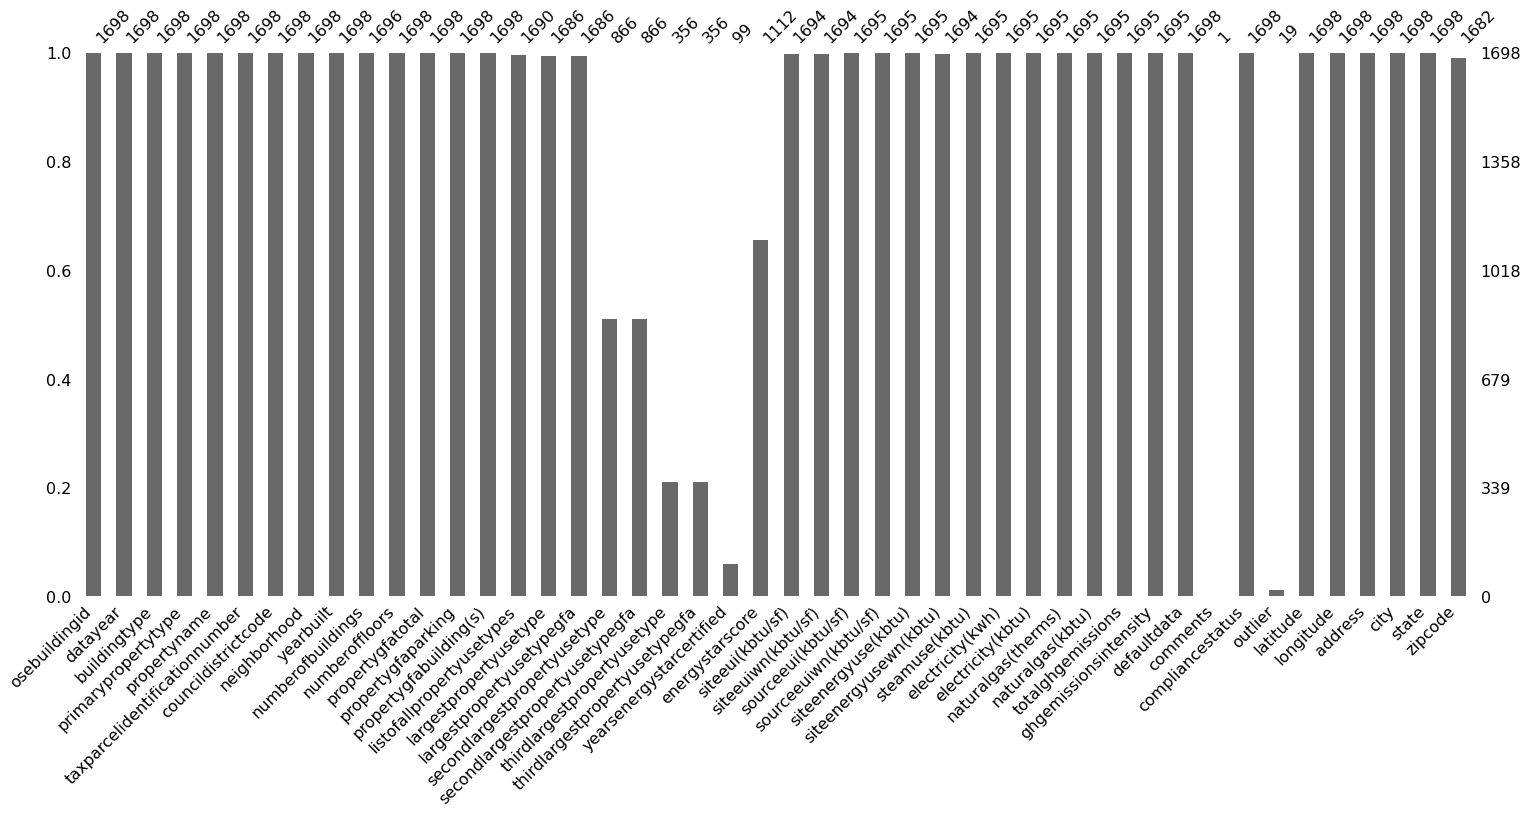

In [1347]:
msno.bar(data)

In [1348]:
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
propertyname                        0.000000
taxparcelidentificationnumber       0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.117786
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.471143
largestpropertyusetype              0.706714
largestpropertyusetypegfa           0.706714
secondlargestpropertyusetype       48.998822
secondlargestpropertyusetypegfa    48.998822
thirdlargestpropertyusetype        79.034158
thirdlargestpropertyusetypegfa     79.034158
yearsenergystarcertified           94.169611
energystar

In [1349]:
data.columns.tolist()

['osebuildingid',
 'datayear',
 'buildingtype',
 'primarypropertytype',
 'propertyname',
 'taxparcelidentificationnumber',
 'councildistrictcode',
 'neighborhood',
 'yearbuilt',
 'numberofbuildings',
 'numberoffloors',
 'propertygfatotal',
 'propertygfaparking',
 'propertygfabuilding(s)',
 'listofallpropertyusetypes',
 'largestpropertyusetype',
 'largestpropertyusetypegfa',
 'secondlargestpropertyusetype',
 'secondlargestpropertyusetypegfa',
 'thirdlargestpropertyusetype',
 'thirdlargestpropertyusetypegfa',
 'yearsenergystarcertified',
 'energystarscore',
 'siteeui(kbtu/sf)',
 'siteeuiwn(kbtu/sf)',
 'sourceeui(kbtu/sf)',
 'sourceeuiwn(kbtu/sf)',
 'siteenergyuse(kbtu)',
 'siteenergyusewn(kbtu)',
 'steamuse(kbtu)',
 'electricity(kwh)',
 'electricity(kbtu)',
 'naturalgas(therms)',
 'naturalgas(kbtu)',
 'totalghgemissions',
 'ghgemissionsintensity',
 'defaultdata',
 'comments',
 'compliancestatus',
 'outlier',
 'latitude',
 'longitude',
 'address',
 'city',
 'state',
 'zipcode']

In [1350]:
# variables à supprimer

var_supp=['propertyname','taxparcelidentificationnumber','yearsenergystarcertified','siteeui(kbtu/sf)',
          'siteeuiwn(kbtu/sf)','sourceeui(kbtu/sf)','sourceeuiwn(kbtu/sf)','electricity(kwh)',
          'naturalgas(therms)',
          'ghgemissionsintensity','siteenergyusewn(kbtu)', 'city','state','comments','outlier']

In [1351]:
data.drop(var_supp,axis=1,inplace=True)

In [1352]:
data.shape

(1698, 31)

In [1353]:
# supprimer les lignes NaN des variables target

In [1354]:
data = data[~((data['siteenergyuse(kbtu)'].isnull()) | (data['totalghgemissions'].isnull()))]
data.shape

(1695, 31)

<AxesSubplot:>

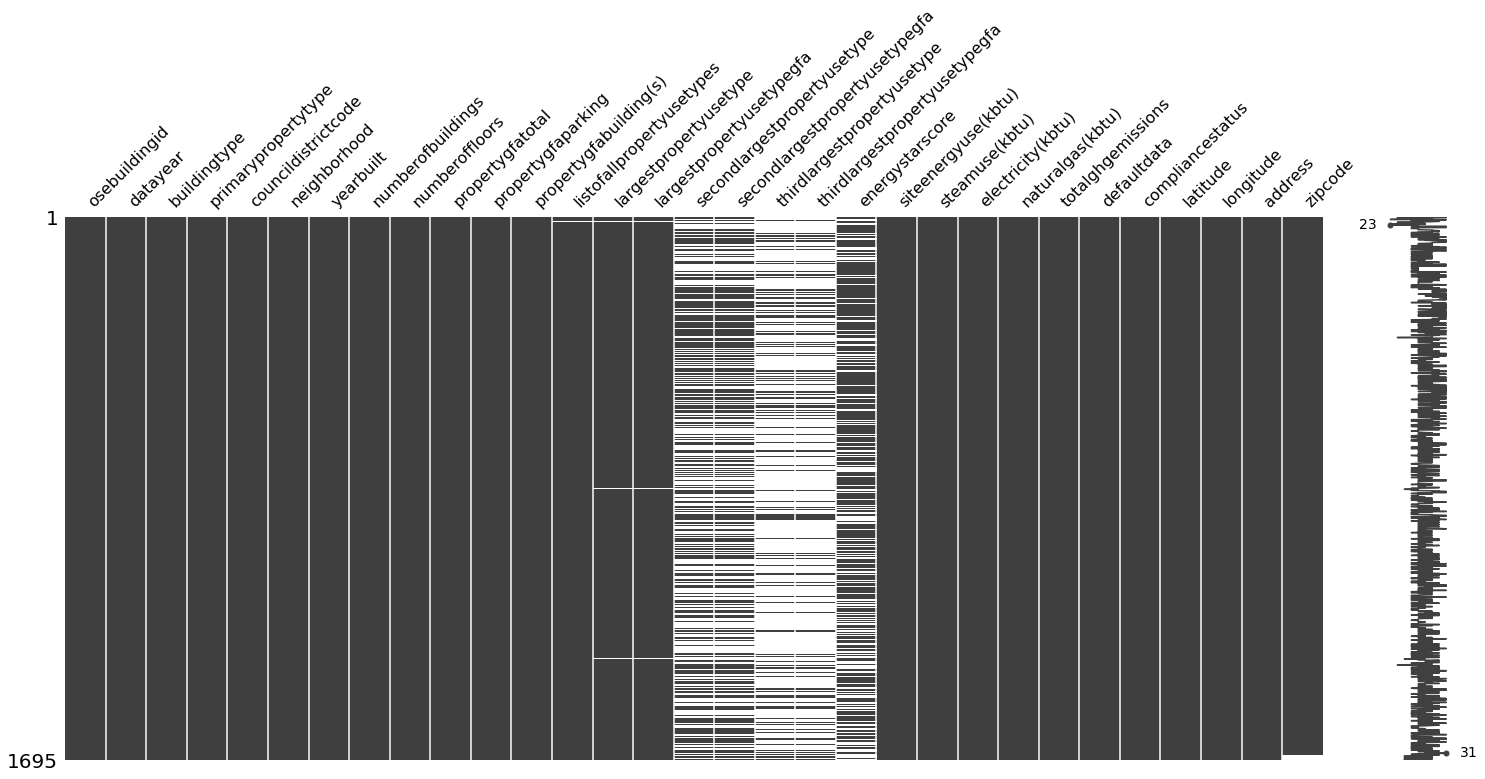

In [1355]:
# visualisation NaN
msno.matrix(data)

In [1356]:
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.589971
largestpropertyusetypegfa           0.589971
secondlargestpropertyusetype       48.908555
secondlargestpropertyusetypegfa    48.908555
thirdlargestpropertyusetype        78.997050
thirdlargestpropertyusetypegfa     78.997050
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

## imputation des données manquantes

In [1357]:
data[data['largestpropertyusetypegfa'].isnull()][['propertygfatotal',
                                                    'largestpropertyusetypegfa', 'secondlargestpropertyusetypegfa',
                                                 'thirdlargestpropertyusetypegfa']]

,propertygfatotal,largestpropertyusetypegfa,secondlargestpropertyusetypegfa,thirdlargestpropertyusetypegfa
204,111077,NaN,NaN,NaN
406,66968,NaN,NaN,NaN
593,54171,NaN,NaN,NaN
1522,22029,NaN,NaN,NaN
2262,23000,NaN,NaN,NaN
2466,21600,NaN,NaN,NaN
353,111445,NaN,NaN,NaN
1147,61721,NaN,NaN,NaN
2414,48350,NaN,NaN,NaN
2459,28800,NaN,NaN,NaN


In [1358]:
# on impute 0 a second et third pour les nan 

In [1359]:
colonnes=['secondlargestpropertyusetypegfa','thirdlargestpropertyusetypegfa']
data[colonnes]=data[colonnes].fillna(0)

In [1360]:
#verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.589971
largestpropertyusetypegfa           0.589971
secondlargestpropertyusetype       48.908555
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype        78.997050
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1361]:
# indexes des largest à récupérer
index = data[data['largestpropertyusetypegfa'].isna()].index.tolist()

In [1362]:
# imputation des largest
data.loc[index,'largestpropertyusetypegfa']=data.loc[index,'propertygfatotal']

In [1363]:
#verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.589971
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype       48.908555
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype        78.997050
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1364]:
# imputation secondlargestpropertyusetype et thirdlargestpropertyusetype

In [1365]:
#visualisation des données
data[['largestpropertyusetype', 'secondlargestpropertyusetype','thirdlargestpropertyusetype']]

,largestpropertyusetype,secondlargestpropertyusetype,thirdlargestpropertyusetype
204,NaN,NaN,NaN
272,Office,NaN,NaN
312,Office,Parking,Other
358,Office,Parking,NaN
405,Office,Parking,NaN
...,...,...,...
3371,Office,NaN,NaN
3372,Other - Recreation,NaN,NaN
3373,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool
3374,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare


In [1366]:
# si la colonnes n'est pas renseignée = pas d'utilisation --> on change les NaN en unused

In [1367]:
colonnes=['secondlargestpropertyusetype','thirdlargestpropertyusetype']
data[colonnes]=data[colonnes].fillna('unused')

In [1368]:
# verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.589971
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype        0.000000
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype         0.000000
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1369]:
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.589971
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype        0.000000
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype         0.000000
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1370]:
data[['largestpropertyusetype', 'primarypropertytype']]

,largestpropertyusetype,primarypropertytype
204,NaN,Retail Store
272,Office,Small- and Mid-Sized Office
312,Office,Large Office
358,Office,Small- and Mid-Sized Office
405,Office,Large Office
...,...,...
3371,Office,Office
3372,Other - Recreation,Other
3373,Other - Recreation,Other
3374,Other - Recreation,Mixed Use Property


In [1371]:
#imputer a largestpropertyusetype la valeur de primarypropertytype 
index=data[data['largestpropertyusetype'].isna()].index.tolist()
data.loc[index,'largestpropertyusetype']=data.loc[index,'primarypropertytype']

In [1372]:
#verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.353982
largestpropertyusetype              0.000000
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype        0.000000
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype         0.000000
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1373]:
# variable listofallpropertyusetypes 
data[['largestpropertyusetype','secondlargestpropertyusetype','thirdlargestpropertyusetype', 'listofallpropertyusetypes']]

,largestpropertyusetype,secondlargestpropertyusetype,thirdlargestpropertyusetype,listofallpropertyusetypes
204,Retail Store,unused,unused,NaN
272,Office,unused,unused,Office
312,Office,Parking,Other,"Data Center, Office, Other, Parking, Restaurant"
358,Office,Parking,unused,"Office, Parking"
405,Office,Parking,unused,"Office, Parking"
...,...,...,...,...
3371,Office,unused,unused,Office
3372,Other - Recreation,unused,unused,Other - Recreation
3373,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,"Fitness Center/Health Club/Gym, Other - Recrea..."
3374,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,"Fitness Center/Health Club/Gym, Food Service, ..."


In [1374]:
# imputer a listofallpropertyusetypes la valeur de largest largestpropertyusetype pour les NaN
index=data[data['listofallpropertyusetypes'].isna()].index.tolist()
data.loc[index,'listofallpropertyusetypes']=data.loc[index,'largestpropertyusetype']

In [1375]:
#Verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.000000
largestpropertyusetype              0.000000
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype        0.000000
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype         0.000000
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1376]:
# variable siteenergyuse(kbtu) 
data[data['siteenergyuse(kbtu)'].isnull()]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode


In [1377]:
# il s'agit d'un seul immeuble dont la valeur n'est pas connue --> on impute 0
data['siteenergyuse(kbtu)'] = data['siteenergyuse(kbtu)'].fillna(0)

In [1378]:
#Verif
data.isnull().mean()*100

osebuildingid                       0.000000
datayear                            0.000000
buildingtype                        0.000000
primarypropertytype                 0.000000
councildistrictcode                 0.000000
neighborhood                        0.000000
yearbuilt                           0.000000
numberofbuildings                   0.000000
numberoffloors                      0.000000
propertygfatotal                    0.000000
propertygfaparking                  0.000000
propertygfabuilding(s)              0.000000
listofallpropertyusetypes           0.000000
largestpropertyusetype              0.000000
largestpropertyusetypegfa           0.000000
secondlargestpropertyusetype        0.000000
secondlargestpropertyusetypegfa     0.000000
thirdlargestpropertyusetype         0.000000
thirdlargestpropertyusetypegfa      0.000000
energystarscore                    34.395280
siteenergyuse(kbtu)                 0.000000
steamuse(kbtu)                      0.000000
electricit

In [1379]:
# variable zipcode 
data[data['zipcode'].isnull()]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
3360,50196,2016,Nonresidential COS,Mixed Use Property,5,NORTH,2005,1.0,1.0,20616,...,0.0,6.369655e+05,0.000000e+00,4.44,False,Compliant,47.70541,-122.32232,10510 5th Ave NE,NaN
3361,50198,2016,Nonresidential COS,Other,3,CENTRAL,2013,1.0,1.0,11685,...,0.0,3.472887e+05,5.037650e+05,29.18,False,Compliant,47.59905,-122.29787,405 MLK Jr Way S,NaN
3362,50201,2016,Nonresidential COS,Other,6,BALLARD,2010,1.0,1.0,11968,...,0.0,4.032431e+05,3.801800e+05,23.00,False,Compliant,47.6933,-122.37717,8729 15th Ave NW,NaN
3363,50204,2016,Nonresidential COS,Other,5,NORTH,1949,1.0,1.0,11285,...,0.0,4.317954e+05,2.138700e+05,14.37,False,Compliant,47.72126,-122.29735,2806 NE 127th St,NaN
3364,50207,2016,Nonresidential COS,Other,6,BALLARD,1911,1.0,1.0,16795,...,0.0,5.421344e+05,3.944820e+05,24.73,False,Compliant,47.67295,-122.39228,6020 28th ave NW,NaN
3365,50208,2016,Nonresidential COS,Other,6,BALLARD,1972,1.0,1.0,12769,...,0.0,1.205173e+06,3.912135e+06,216.18,False,Compliant,47.67734,-122.37624,1471 NW 67th St,NaN
3366,50210,2016,Nonresidential COS,Office,7,MAGNOLIA / QUEEN ANNE,1952,1.0,1.0,13661,...,0.0,5.026678e+05,0.000000e+00,3.50,True,Error - Correct Default Data,47.63572,-122.37525,1403 w howe,NaN
3367,50212,2016,Nonresidential COS,Other,3,EAST,1912,1.0,1.0,23445,...,0.0,1.260870e+06,4.715376e+06,259.22,False,Compliant,47.63228,-122.31574,1400 E Galer St,NaN
3368,50219,2016,Nonresidential COS,Mixed Use Property,3,CENTRAL,1994,1.0,1.0,20050,...,0.0,7.694531e+05,1.043951e+06,60.81,False,Compliant,47.60775,-122.30225,2323 East Cherry St,NaN
3369,50220,2016,Nonresidential COS,Office,2,SOUTHEAST,1960,1.0,1.0,15398,...,0.0,2.775369e+05,1.102730e+05,7.79,True,Error - Correct Default Data,47.5644,-122.27813,4420 S Genesee,NaN


In [1380]:
# creation d'une liste des indexes des adresses sans zipcode
index=data[data['zipcode'].isnull()].index.tolist()

In [1381]:
# après recherche sur googlemap des zipcode on impute aux NaN les valeurs manquantes
liste=(98125,98144,98117,98125,98107,98117,98119,98112,98122,98118,98126,98108,98104,98119,98108,98108)
pd.DataFrame(liste)

,0
0,98125
1,98144
2,98117
3,98125
4,98107
5,98117
6,98119
7,98112
8,98122
9,98118


In [1382]:
data.loc[index,'zipcode']=liste

In [1383]:
#verif
data.isnull().mean()*100

osebuildingid                       0.00000
datayear                            0.00000
buildingtype                        0.00000
primarypropertytype                 0.00000
councildistrictcode                 0.00000
neighborhood                        0.00000
yearbuilt                           0.00000
numberofbuildings                   0.00000
numberoffloors                      0.00000
propertygfatotal                    0.00000
propertygfaparking                  0.00000
propertygfabuilding(s)              0.00000
listofallpropertyusetypes           0.00000
largestpropertyusetype              0.00000
largestpropertyusetypegfa           0.00000
secondlargestpropertyusetype        0.00000
secondlargestpropertyusetypegfa     0.00000
thirdlargestpropertyusetype         0.00000
thirdlargestpropertyusetypegfa      0.00000
energystarscore                    34.39528
siteenergyuse(kbtu)                 0.00000
steamuse(kbtu)                      0.00000
electricity(kbtu)               

## Outliers

In [1384]:
# statistiques descriptives des variables quanti
data.describe()

,osebuildingid,datayear,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,secondlargestpropertyusetypegfa,thirdlargestpropertyusetypegfa,energystarscore,siteenergyuse(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions
count,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1.695000e+03,1695.000000,1.695000e+03,1.695000e+03,1695.000000,1695.000000,1112.000000,1.695000e+03,1.695000e+03,1.695000e+03,1.695000e+03,1695.000000
mean,16338.187021,2015.982891,4.367552,1961.752212,1.169322,4.105015,1.185951e+05,13153.827729,1.054413e+05,9.861141e+04,18872.404305,3116.320589,65.544065,8.476349e+06,5.182738e+05,5.850148e+06,1.998808e+06,186.944873
std,13814.481071,0.129716,2.192347,32.855736,2.909741,6.521751,2.957126e+05,43269.626907,2.821804e+05,2.747809e+05,53237.776506,17833.213253,28.432810,3.023379e+07,5.490941e+06,2.071024e+07,9.488313e+06,755.340584
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,583.500000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.938600e+04,0.000000,2.831450e+04,2.549050e+04,0.000000,0.000000,49.000000,1.219804e+06,0.000000e+00,7.199750e+05,0.000000e+00,19.870000
50%,21150.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.924900e+04,0.000000,4.723700e+04,4.366100e+04,0.000000,0.000000,73.000000,2.551022e+06,0.000000e+00,1.611215e+06,4.965300e+05,49.550000
75%,24601.500000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.050805e+05,0.000000,9.460650e+04,9.200300e+04,12667.000000,0.000000,89.000000,6.867819e+06,0.000000e+00,4.821154e+06,1.522622e+06,142.155000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000


In [1385]:
# on remarque des min négatifs sur les variables electricity(kbtu) et totalghgemissions
data[data['electricity(kbtu)'] < 0]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,2013,1.0,6.0,52000,...,0.0,-115417.0,0.0,-0.8,False,Compliant,47.61432,-122.31257,1501 E. Madison St.,98122.0


In [1386]:
data[data['totalghgemissions'] < 0]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,2013,1.0,6.0,52000,...,0.0,-115417.0,0.0,-0.8,False,Compliant,47.61432,-122.31257,1501 E. Madison St.,98122.0


In [1387]:
# numberof building =111? 


In [1388]:
data[data['numberofbuildings']==111]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
3274,49967,2016,Campus,University,4,NORTHEAST,1900,111.0,0.0,9320156,...,84985240.0,657074389.0,0.0,11140.56,False,Compliant,47.65644,-122.31041,NE 45th St & Brooklyn Ave,98105.0


In [1389]:
#nombre d'étage =99?

In [1390]:
data[data['numberoffloors']==99]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
1359,21611,2016,NonResidential,Worship Facility,2,GREATER DUWAMISH,1977,1.0,99.0,21948,...,0.0,326001.0,0.0,2.27,False,Compliant,47.55072,-122.30265,5801 Beacon Avenue South,98108.0


In [1391]:
data.loc[data['numberoffloors'] == 99, 'numberoffloors'] = 2

In [1392]:
#verif
data.describe()

,osebuildingid,datayear,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,secondlargestpropertyusetypegfa,thirdlargestpropertyusetypegfa,energystarscore,siteenergyuse(kbtu),steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions
count,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1.695000e+03,1695.000000,1.695000e+03,1.695000e+03,1695.000000,1695.000000,1112.000000,1.695000e+03,1.695000e+03,1.695000e+03,1.695000e+03,1695.000000
mean,16338.187021,2015.982891,4.367552,1961.752212,1.169322,4.047788,1.185951e+05,13153.827729,1.054413e+05,9.861141e+04,18872.404305,3116.320589,65.544065,8.476349e+06,5.182738e+05,5.850148e+06,1.998808e+06,186.944873
std,13814.481071,0.129716,2.192347,32.855736,2.909741,6.100551,2.957126e+05,43269.626907,2.821804e+05,2.747809e+05,53237.776506,17833.213253,28.432810,3.023379e+07,5.490941e+06,2.071024e+07,9.488313e+06,755.340584
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,583.500000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.938600e+04,0.000000,2.831450e+04,2.549050e+04,0.000000,0.000000,49.000000,1.219804e+06,0.000000e+00,7.199750e+05,0.000000e+00,19.870000
50%,21150.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.924900e+04,0.000000,4.723700e+04,4.366100e+04,0.000000,0.000000,73.000000,2.551022e+06,0.000000e+00,1.611215e+06,4.965300e+05,49.550000
75%,24601.500000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.050805e+05,0.000000,9.460650e+04,9.200300e+04,12667.000000,0.000000,89.000000,6.867819e+06,0.000000e+00,4.821154e+06,1.522622e+06,142.155000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000


In [1393]:
# verif --> ce n'est pas abbérant
data[data['numberoffloors']==76]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
559,775,2016,NonResidential,Large Office,7,DOWNTOWN,1985,1.0,76.0,1952220,...,0.0,87851862.0,5085763.0,882.56,False,Compliant,47.60454,-122.33072,701 5th Avenue,98104.0


In [1394]:
# statistiques descriptives des variables quali
data.describe(exclude=[np.number])

,buildingtype,primarypropertytype,neighborhood,listofallpropertyusetypes,largestpropertyusetype,secondlargestpropertyusetype,thirdlargestpropertyusetype,defaultdata,compliancestatus,latitude,longitude,address,zipcode
count,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695.00000,1695.00000,1695,1695.0
unique,5,24,19,383,62,48,40,4,4,1525.00000,1435.00000,1674,60.0
top,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,Office,Office,unused,unused,False,Compliant,47.66246,-122.29898,2600 SW Barton St,98134.0
freq,1486,298,369,144,505,829,1339,1578,1577,9.00000,8.00000,4,182.0


In [1395]:
#focus sur la variable defaultdata
data['defaultdata']

204        No
272        No
312        No
358       Yes
405        No
        ...  
3371     True
3372    False
3373    False
3374    False
3375    False
Name: defaultdata, Length: 1695, dtype: object

In [1396]:
# defaultdata contient 'No' et 'Yes' ==> à transformer en booléen
data['defaultdata'] = data['defaultdata'].map({'No': False, 'Yes': True}).astype('bool')

In [1397]:
#verif
data['defaultdata'].unique()

array([False,  True])

In [1398]:
#focus sur compliancestatus
data['compliancestatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [1399]:
data[data['compliancestatus'] == 'Missing Data']

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode
28,34,2016,SPS-District K-12,K-12 School,3,Central,1955,1.0,1.0,126351,...,0.0,0.0,0.0,0.00,True,Missing Data,47.62266,-122.30547,301/300 21st Ave. E.,98112.0
31,37,2016,SPS-District K-12,K-12 School,7,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,...,0.0,1496816.0,0.0,10.43,True,Missing Data,47.6329,-122.35172,201 Garfield St.,98109.0
62,87,2016,SPS-District K-12,K-12 School,1,SOUTHWEST,1948,1.0,2.0,53352,...,0.0,600813.0,0.0,4.19,True,Missing Data,47.5097,-122.37759,3701 S.W. 104th St.,98146.0
81,118,2016,SPS-District K-12,K-12 School,1,DELRIDGE,1999,1.0,3.0,74468,...,0.0,1698176.0,0.0,11.84,True,Missing Data,47.5636,-122.358,1901 SW Genesee St.,98106.0
85,122,2016,SPS-District K-12,K-12 School,2,SOUTHEAST,1991,1.0,2.0,58933,...,0.0,2347138.0,0.0,16.36,True,Missing Data,47.57324,-122.29058,3301 S. Horton St.,98144.0
95,140,2016,SPS-District K-12,K-12 School,6,LAKE UNION,1991,1.0,3.0,66588,...,0.0,2104286.0,0.0,14.67,True,Missing Data,47.65464,-122.34912,3921 Linden Ave. N.,98103.0
133,217,2016,SPS-District K-12,K-12 School,6,BALLARD,1959,1.0,1.0,160270,...,0.0,0.0,4318917.0,229.38,True,Missing Data,47.69675,-122.3776,9201 15th Ave. NW.,98117.0
139,227,2016,SPS-District K-12,K-12 School,3,CENTRAL,1963,1.0,3.0,136188,...,0.0,0.0,3217877.0,170.90,True,Missing Data,47.59796,-122.30415,2101 S. Jackson,98144.0
152,242,2016,SPS-District K-12,K-12 School,5,NORTH,1989,1.0,2.0,52792,...,0.0,0.0,0.0,0.00,True,Missing Data,47.69823,-122.32126,504 N.E. 95th St.,98115.0
614,820,2016,SPS-District K-12,K-12 School,3,CENTRAL,1988,1.0,1.0,52924,...,0.0,1957268.0,0.0,13.64,True,Missing Data,47.6012,-122.31548,1301 E. Yesler Way,98122.0


In [1400]:
# quand il y a missing data --> defaultdata=true --> données manquandtes sur la consommation --> drop les lignes ou la consommation d'électricité =0 
# alors qu'a priori ce n'est pas le cas

In [1401]:
liste= data[data['siteenergyuse(kbtu)'] == 0].index.to_list()
data = data.drop(index=liste)

In [1402]:
# Vérification
data[data['siteenergyuse(kbtu)'] == 0]

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode


In [1403]:
data[data['compliancestatus'] == 'Missing Data']

,osebuildingid,datayear,buildingtype,primarypropertytype,councildistrictcode,neighborhood,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,...,steamuse(kbtu),electricity(kbtu),naturalgas(kbtu),totalghgemissions,defaultdata,compliancestatus,latitude,longitude,address,zipcode


<AxesSubplot:>

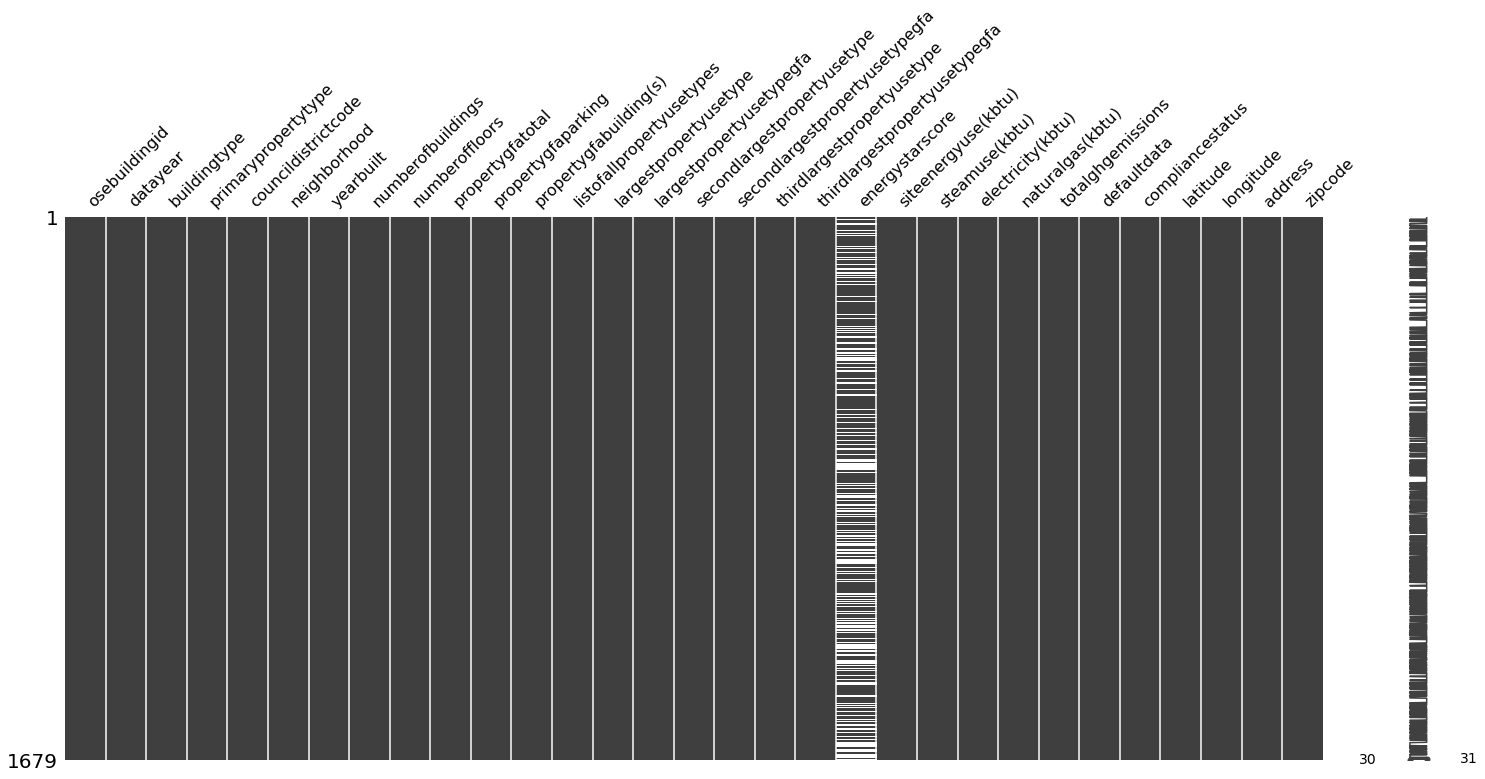

In [1404]:
msno.matrix(data)

In [1405]:
data.shape

(1679, 31)

# Analyse exploratoire

## Analyse des variables qualitatives

In [1406]:
cols_cat = data.select_dtypes(exclude=[np.number]).columns.to_list()

In [1407]:
cols_cat

['buildingtype',
 'primarypropertytype',
 'neighborhood',
 'listofallpropertyusetypes',
 'largestpropertyusetype',
 'secondlargestpropertyusetype',
 'thirdlargestpropertyusetype',
 'defaultdata',
 'compliancestatus',
 'latitude',
 'longitude',
 'address',
 'zipcode']

In [1408]:
# transformer latitude et longitude en float
data['longitude']=data['longitude'].astype(float)
data['latitude']=data['latitude'].astype(float)

In [1409]:
cols_cat = data.select_dtypes(exclude=[np.number]).columns.to_list()

In [1410]:
cols_cat

['buildingtype',
 'primarypropertytype',
 'neighborhood',
 'listofallpropertyusetypes',
 'largestpropertyusetype',
 'secondlargestpropertyusetype',
 'thirdlargestpropertyusetype',
 'defaultdata',
 'compliancestatus',
 'address',
 'zipcode']

In [1411]:
# Type de Batiment

In [1412]:
type_batiment = data.groupby(by='buildingtype')['osebuildingid'].nunique()

In [1413]:
type_batiment

buildingtype
Campus                  25
NonResidential        1484
Nonresidential COS      85
Nonresidential WA        1
SPS-District K-12       84
Name: osebuildingid, dtype: int64

In [1414]:
# visualisation type de batiment 

In [1415]:
# fonction pie_fig
def pie_fig (df,df_title):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(df.values, labels=df.index, autopct='%1.2f%%')
    ax.axis('equal')
    ax.set_title(df_title)
    plt.show()

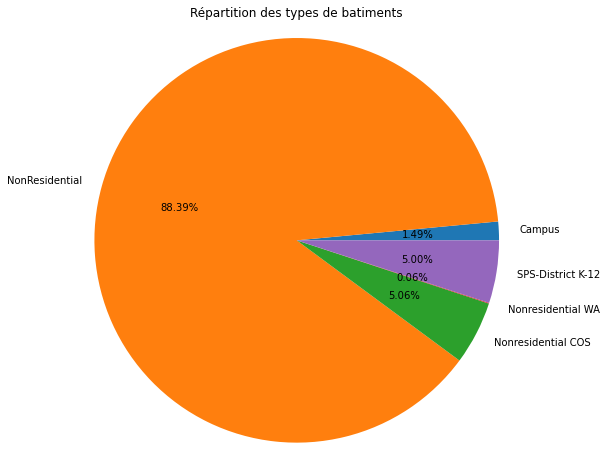

In [1416]:
pie_fig(type_batiment, 'Répartition des types de batiments')

In [1417]:
# variable primarypropertytype
premier_usage = data.groupby(by='primarypropertytype')['osebuildingid'].nunique()

In [1418]:
premier_usage

primarypropertytype
Distribution Center             53
Hospital                        10
Hotel                           76
K-12 School                    126
Laboratory                      10
Large Office                   176
Low-Rise Multifamily             3
Medical Office                  42
Mixed Use Property             114
Non-Refrigerated Warehouse       2
Office                           3
Other                          255
Refrigerated Warehouse          12
Residence Hall                  21
Restaurant                      12
Restaurant\n                     1
Retail Store                    94
Self-Storage Facility           28
Senior Care Community           20
Small- and Mid-Sized Office    298
Supermarket / Grocery Store     40
University                      24
Warehouse                      187
Worship Facility                72
Name: osebuildingid, dtype: int64

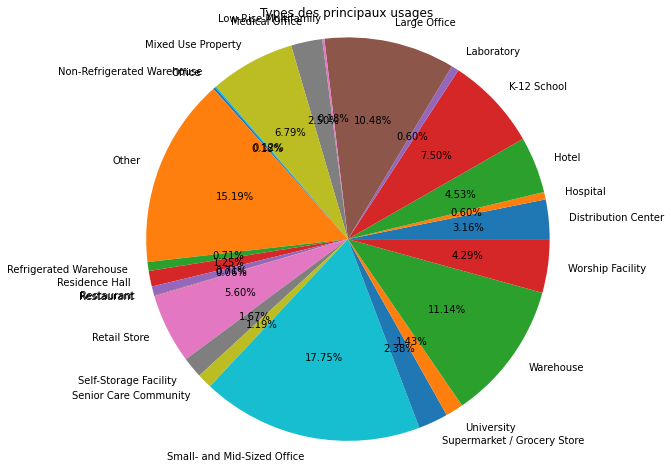

In [1419]:
pie_fig(premier_usage,'Types des principaux usages')

In [1420]:
most_used=data.loc[(data['buildingtype']=="NonResidential"),'primarypropertytype'].value_counts()

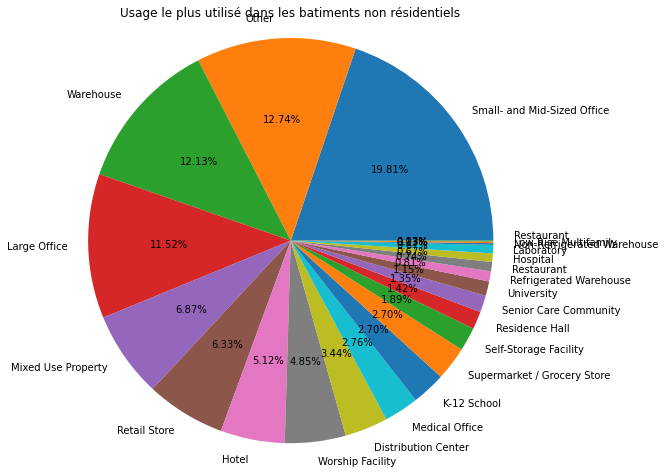

In [1421]:
pie_fig(most_used, 'Usage le plus utilisé dans les batiments non résidentiels')

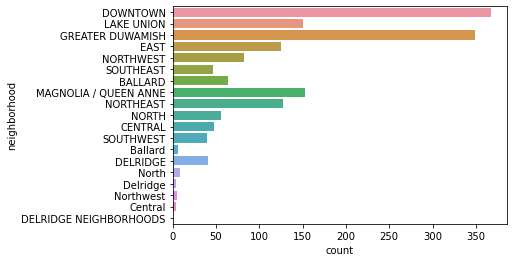

In [1422]:
ax = sns.countplot(y='neighborhood', data=data)

In [1423]:
# variables quanti 
cols_num=data.select_dtypes(include=np.number).columns.to_list()

In [1424]:
cols_num

['osebuildingid',
 'datayear',
 'councildistrictcode',
 'yearbuilt',
 'numberofbuildings',
 'numberoffloors',
 'propertygfatotal',
 'propertygfaparking',
 'propertygfabuilding(s)',
 'largestpropertyusetypegfa',
 'secondlargestpropertyusetypegfa',
 'thirdlargestpropertyusetypegfa',
 'energystarscore',
 'siteenergyuse(kbtu)',
 'steamuse(kbtu)',
 'electricity(kbtu)',
 'naturalgas(kbtu)',
 'totalghgemissions',
 'latitude',
 'longitude']

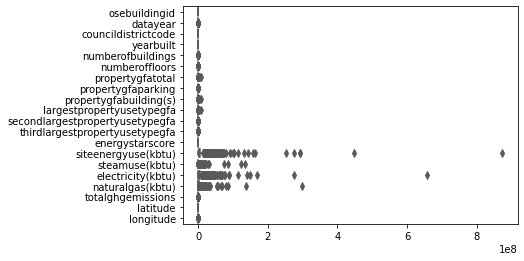

In [1425]:
# visualisation d'ensemble sur les boxplot
ax=sns.boxplot(data=data[cols_num],orient="h", palette="Set2")

### focus variable par variable

In [1426]:
#creation fonction histplot et boxplot
def histplot_df(v):
    plt.figure(figsize=(16, 6))
    sns.histplot(data[v],kde=True)
    plt.title(v)

In [1427]:
def boxplot_df(v):
    plt.figure(figsize=(16, 6))
    sns.boxplot(y=data[v])
    plt.title(v)

In [1428]:
# variable année de construction
year_built = data.groupby(by='yearbuilt')['osebuildingid'].nunique()

In [1429]:
year_built

yearbuilt
1900    47
1901     2
1902     9
1903     3
1904    13
        ..
2011     5
2012     8
2013    16
2014    12
2015     7
Name: osebuildingid, Length: 113, dtype: int64

In [1430]:
#creation variable age
data['age'] = data['datayear']- data['yearbuilt']

In [1431]:
# visualisation variable age

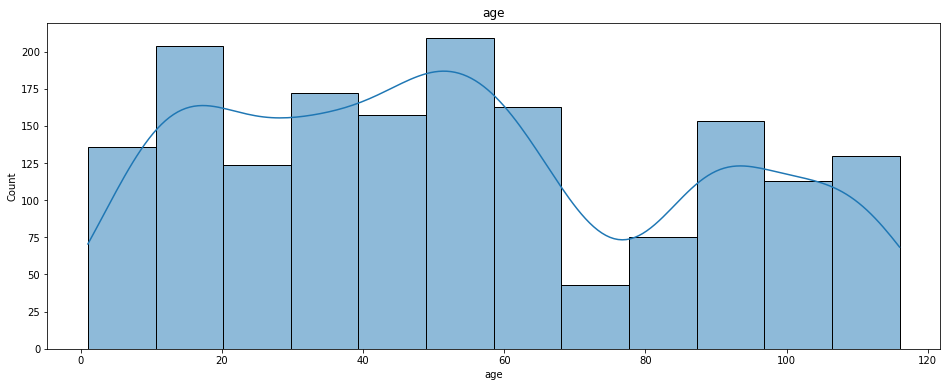

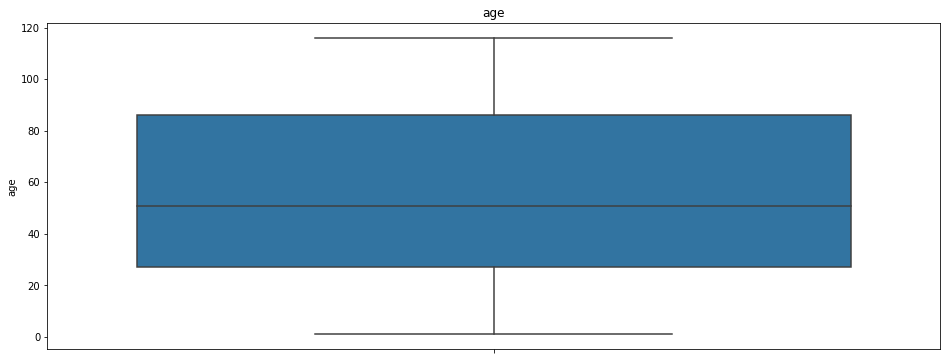

In [1432]:
histplot_df('age')
boxplot_df('age')

In [1433]:
# variable numberofbuildings

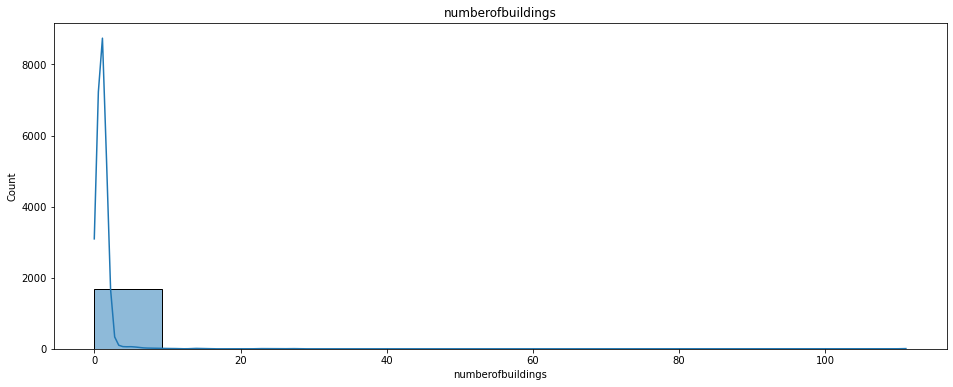

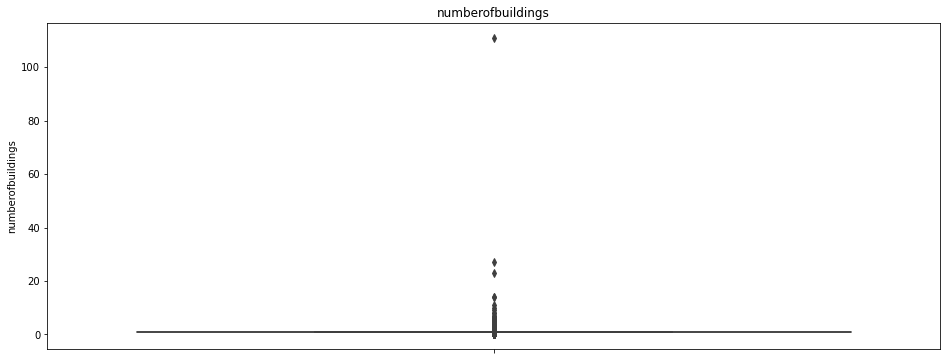

In [1434]:
histplot_df('numberofbuildings')
boxplot_df('numberofbuildings')

In [1435]:
# variable number of floors

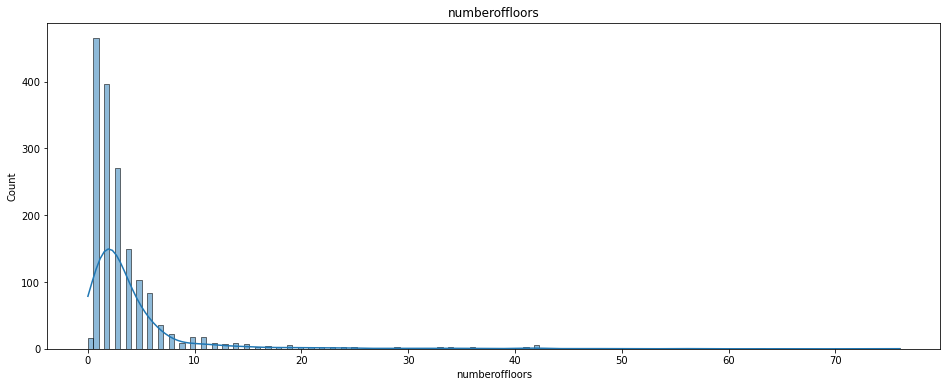

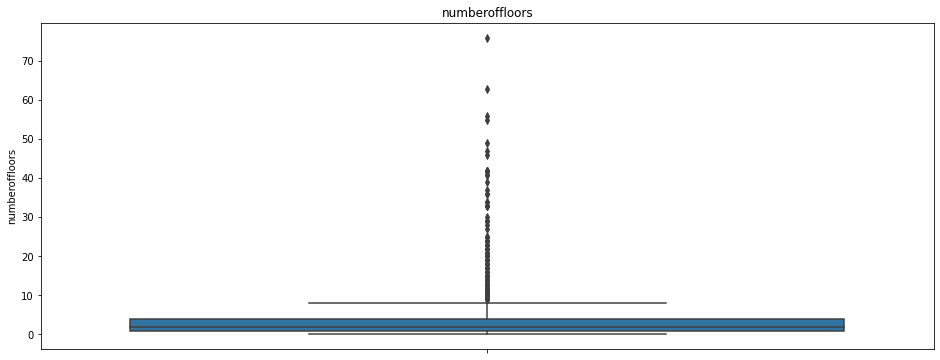

In [1436]:
histplot_df('numberoffloors')
boxplot_df('numberoffloors')

In [1437]:
# variable propertygfatotal

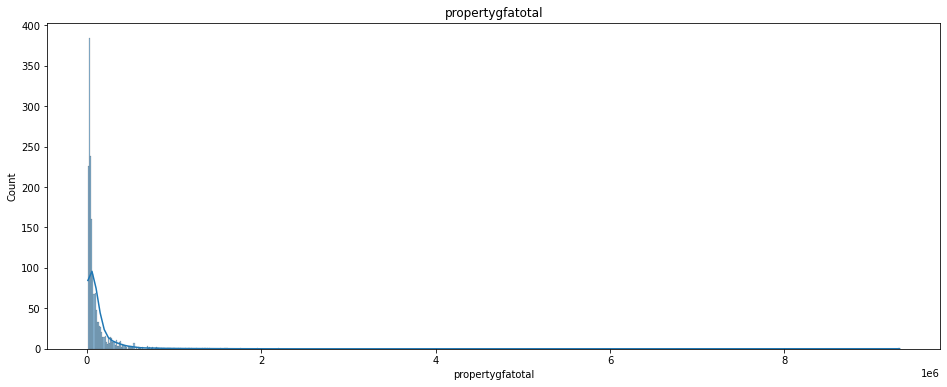

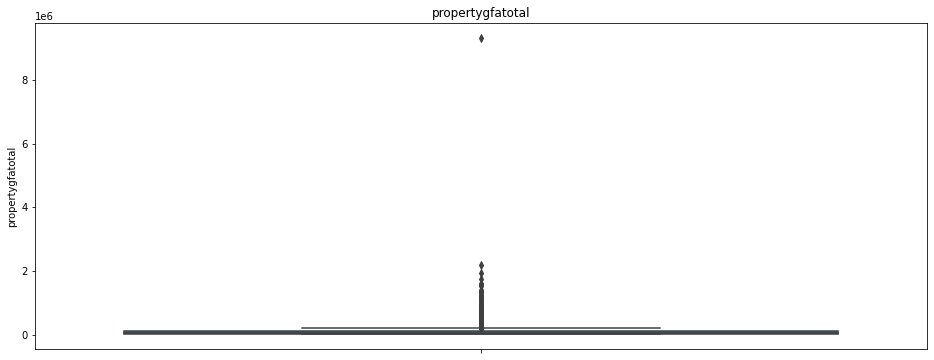

In [1438]:
histplot_df('propertygfatotal')
boxplot_df('propertygfatotal')

In [1439]:
# variable 'propertygfaparking',

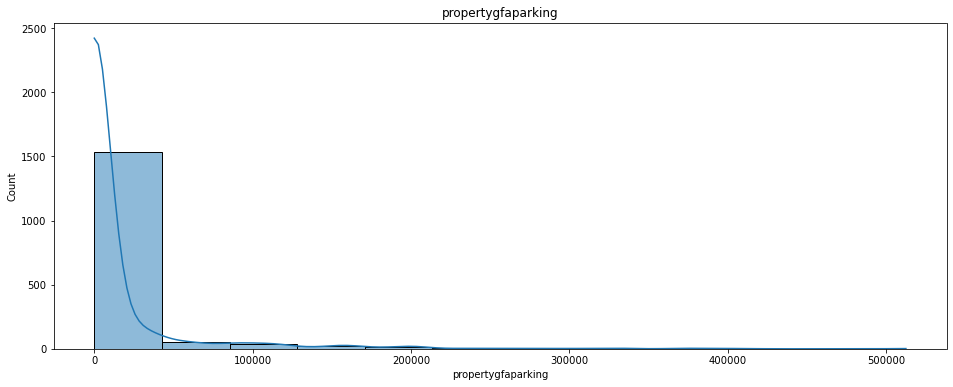

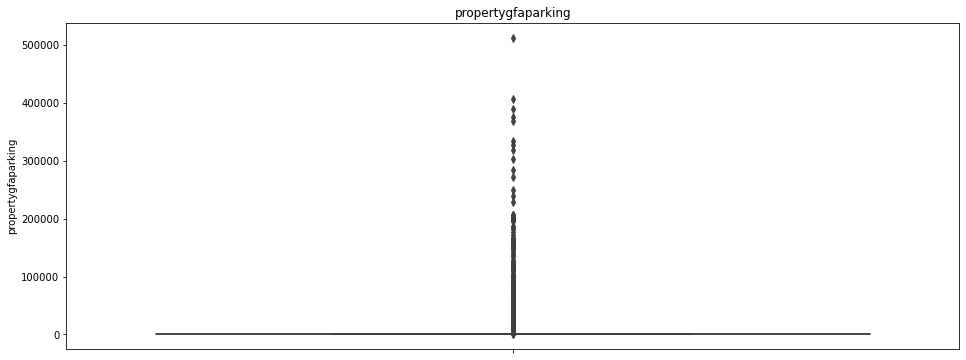

In [1440]:
histplot_df('propertygfaparking')
boxplot_df('propertygfaparking')

In [1441]:
# variable 'propertygfabuilding(s)'

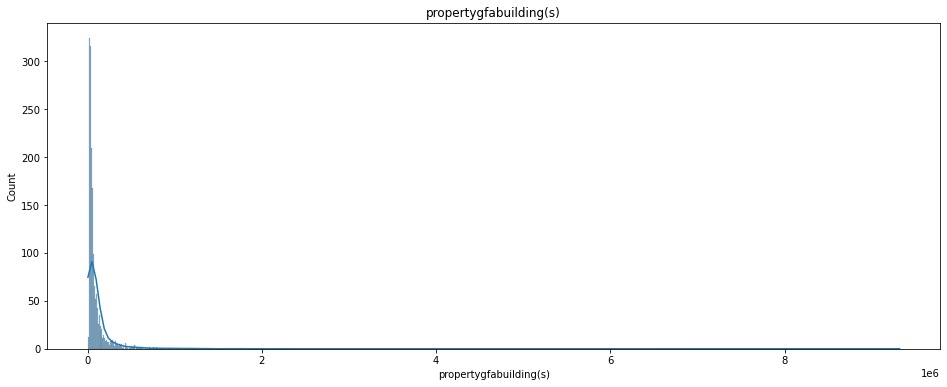

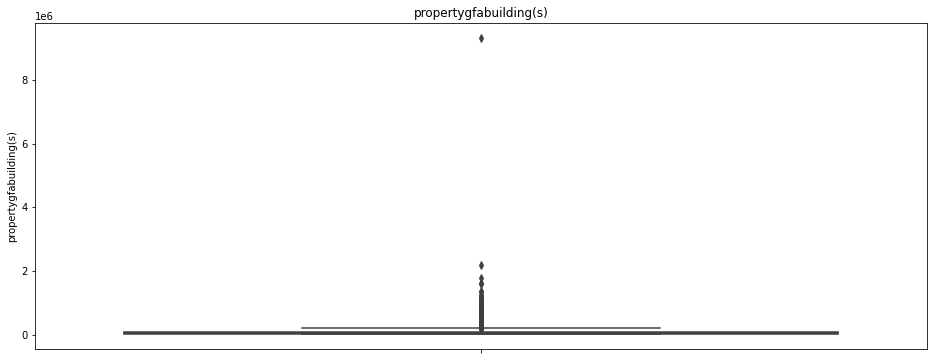

In [1442]:
histplot_df('propertygfabuilding(s)')
boxplot_df('propertygfabuilding(s)')

In [1443]:
# variables : 'largestpropertyusetypegfa','secondlargestpropertyusetypegfa','thirdlargestpropertyusetypegfa'

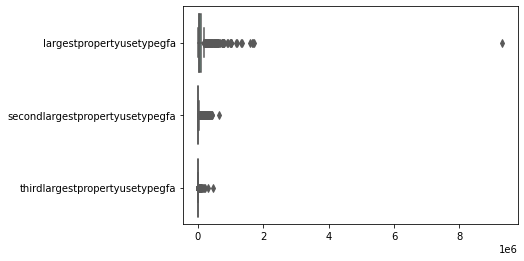

In [1444]:
ax=sns.boxplot(data=data[['largestpropertyusetypegfa','secondlargestpropertyusetypegfa','thirdlargestpropertyusetypegfa']],
               orient="h", palette="Set2")

In [1445]:
# variable  'energystarscore'

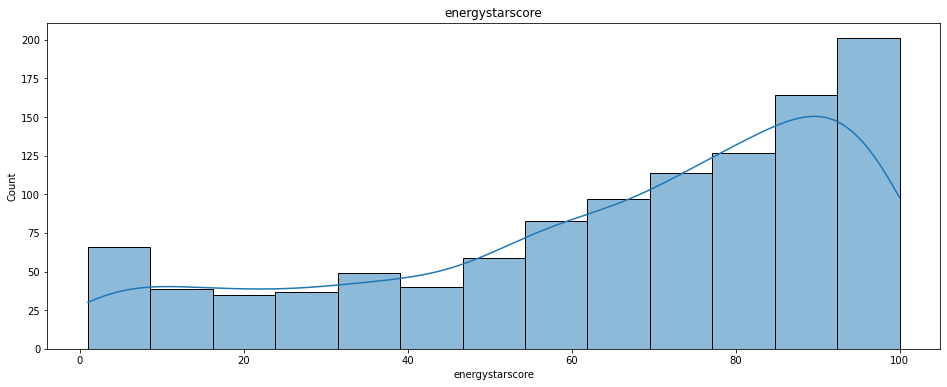

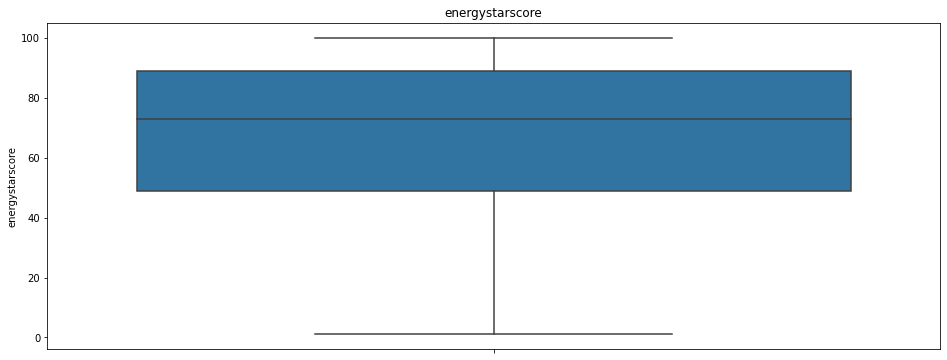

In [1446]:
histplot_df('energystarscore')
boxplot_df('energystarscore')

In [1447]:
# variables 'siteenergyuse(kbtu)','steamuse(kbtu)', 'electricity(kbtu)', 'naturalgas(kbtu)',

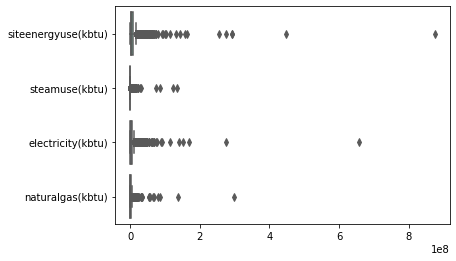

In [1448]:
ax=sns.boxplot(data=data[['siteenergyuse(kbtu)','steamuse(kbtu)', 'electricity(kbtu)', 'naturalgas(kbtu)']],
               orient="h", palette="Set2")

#### variables target : siteenergyuse(kbtu) et totalghgemissions

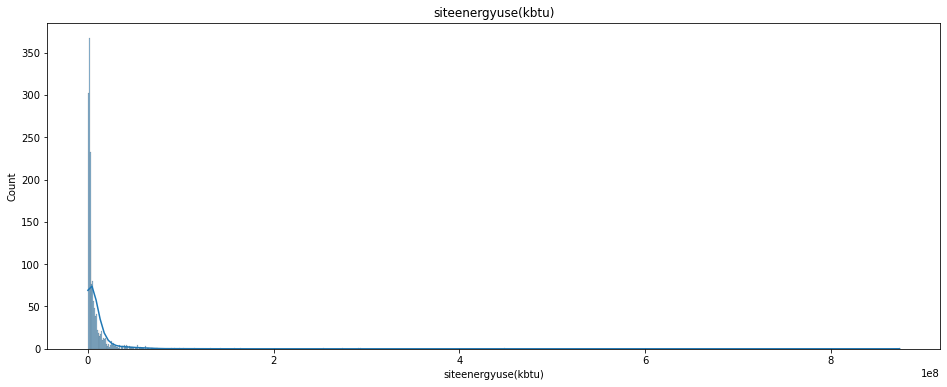

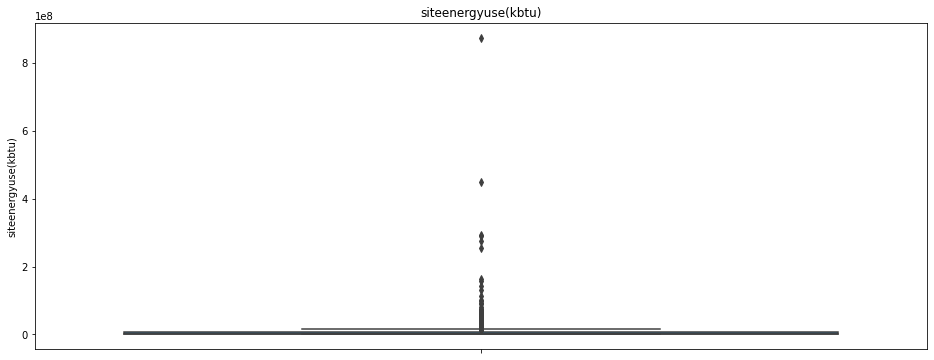

In [1449]:
histplot_df('siteenergyuse(kbtu)')
boxplot_df('siteenergyuse(kbtu)')

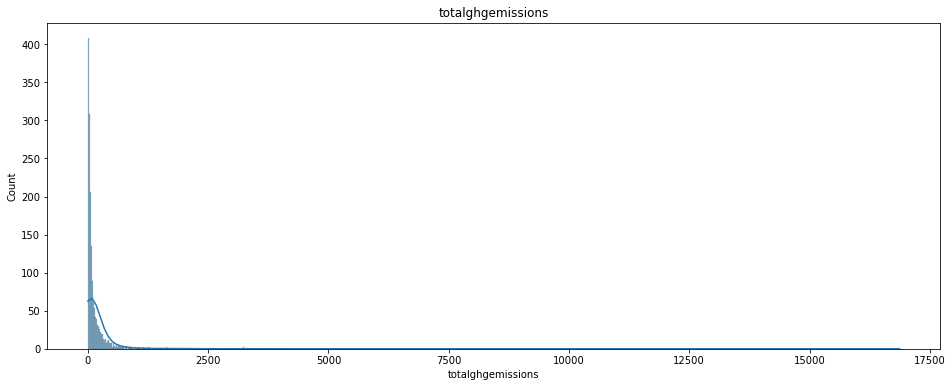

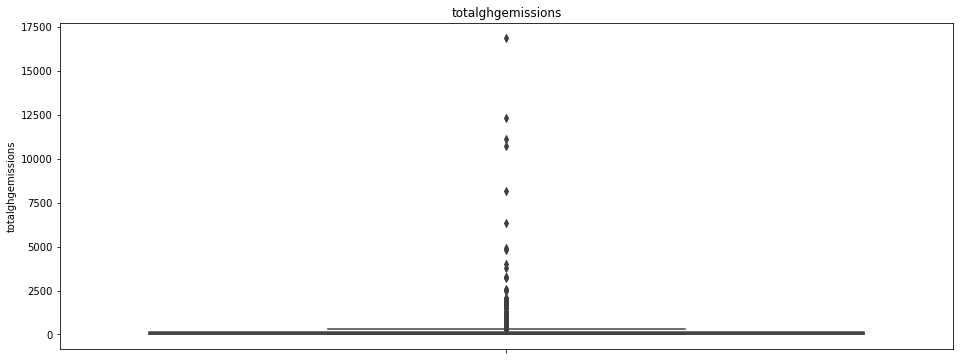

In [1450]:
histplot_df('totalghgemissions')
boxplot_df('totalghgemissions')

In [1451]:
# stat descriptifs des variables target
data[['siteenergyuse(kbtu)','totalghgemissions']].describe()

,siteenergyuse(kbtu),totalghgemissions
count,1.679000e+03,1679.000000
mean,8.557124e+06,188.251775
std,3.036621e+07,758.768334
min,1.680890e+04,-0.800000
25%,1.246643e+06,20.235000
50%,2.586116e+06,49.730000
75%,6.939192e+06,142.375000
max,8.739237e+08,16870.980000


In [1452]:
# normalité ?
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import normaltest

In [1453]:
# Test de normalité
def coeff_asymétrie_applatissement(v):
    print('Skewness for the input data : ', skew(v))
    print( 'Kurtosis value for the given normal distribution :', kurtosis(v))

In [1454]:
coeff_asymétrie_applatissement(data[['siteenergyuse(kbtu)','totalghgemissions']])

Skewness for the input data :  [17.73750959 13.84651456]
Kurtosis value for the given normal distribution : [433.28633189 236.29633212]


In [1455]:
# transformons les target en log

In [1456]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log10, inverse_func = np.exp, check_inverse = True)
emission_log = logtransformer.transform(data['totalghgemissions'])
emission_log=pd.DataFrame(emission_log)
emission_log.columns

C:\Users\mehan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['totalghgemissions'], dtype='object')

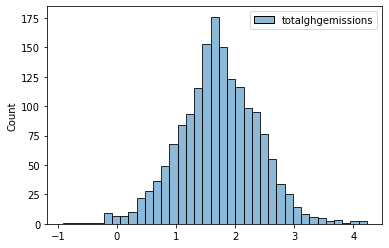

In [1457]:
sns.histplot(data=emission_log)
plt.show()

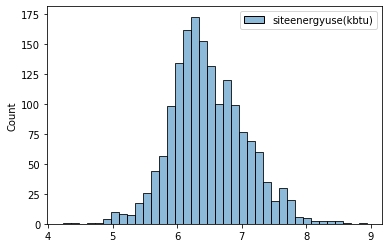

In [1458]:
logtransformer = FunctionTransformer(np.log10, inverse_func = np.exp, check_inverse = True)
energy_log = logtransformer.transform(data['siteenergyuse(kbtu)'])
energy_log=pd.DataFrame(energy_log)
sns.histplot(data=energy_log)
plt.show()

In [1459]:
data['log_siteenergyuse(kbtu)']=np.log10(1+data['siteenergyuse(kbtu)'])
data['log_totalghgemissions']=np.log10(1+data['totalghgemissions'])

## Analyse bivariée 

In [1460]:
# scatterplots des distribition des 2 variables target entre elles

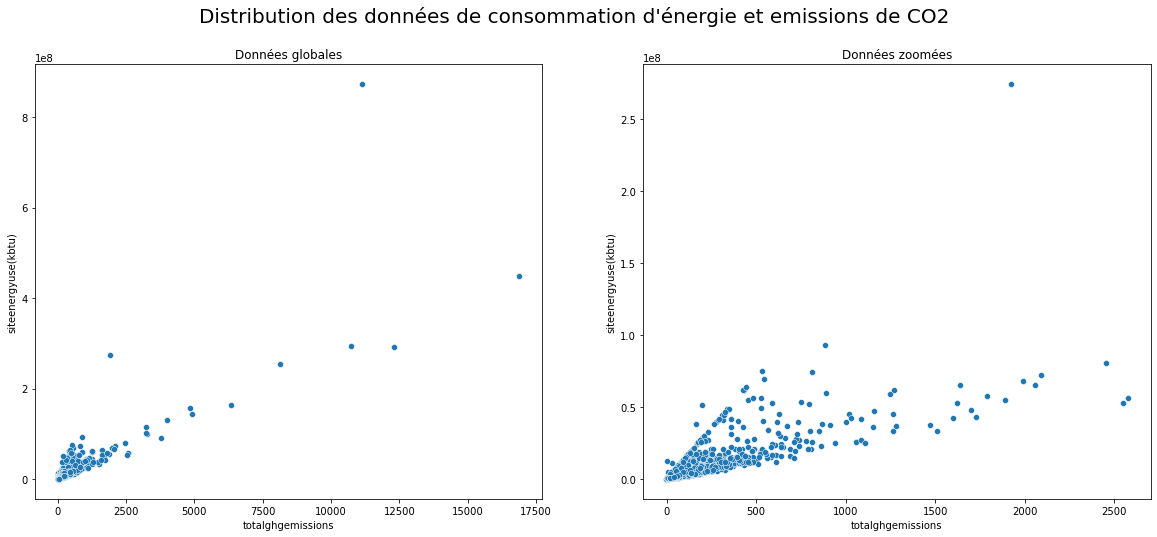

In [1461]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="totalghgemissions", y="siteenergyuse(kbtu)", ax=axes[0])
axes[0].set_title("Données globales")
sns.scatterplot(data=data[(data['totalghgemissions'] < 3000)], x="totalghgemissions", y="siteenergyuse(kbtu)", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle("Distribution des données de consommation d'énergie et emissions de CO2", fontsize=20)
plt.show()

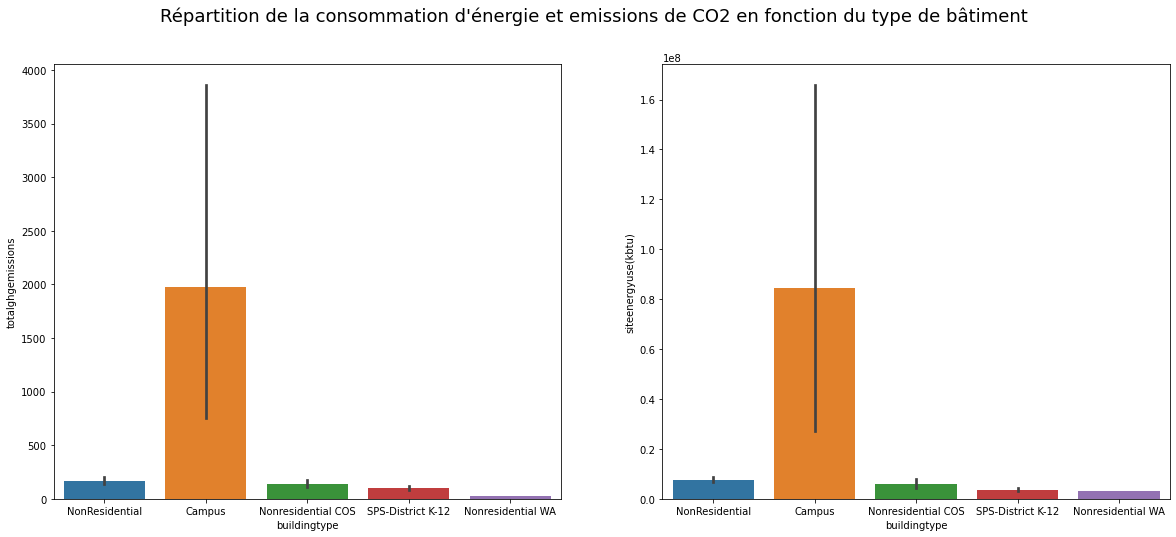

In [1462]:
# consommation en fonction du type de batiment
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.barplot(x='buildingtype',y='totalghgemissions',data=data, ax=axes[0])
sns.barplot(x='buildingtype',y='siteenergyuse(kbtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", fontsize=18)
plt.show()

In [1463]:
# consommation en fonction de l'age de batiment 

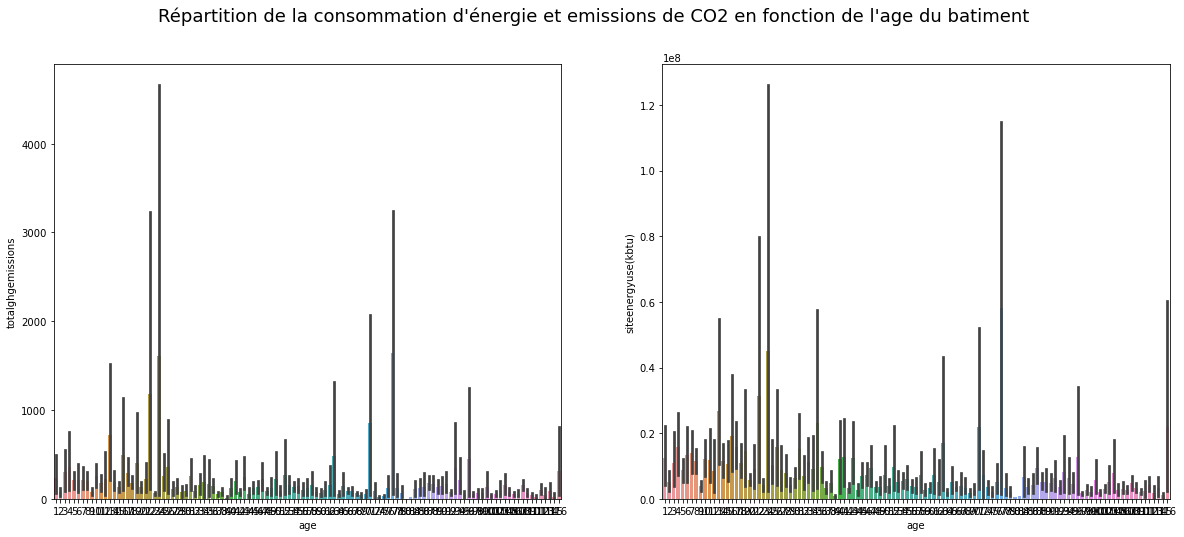

In [1464]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.barplot(x='age',y='totalghgemissions',data=data, ax=axes[0])
sns.barplot(x='age',y='siteenergyuse(kbtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction de l'age du batiment", fontsize=18)
plt.show()

### corrélation 

Text(0.5, 1.0, 'Correlation Indicators')

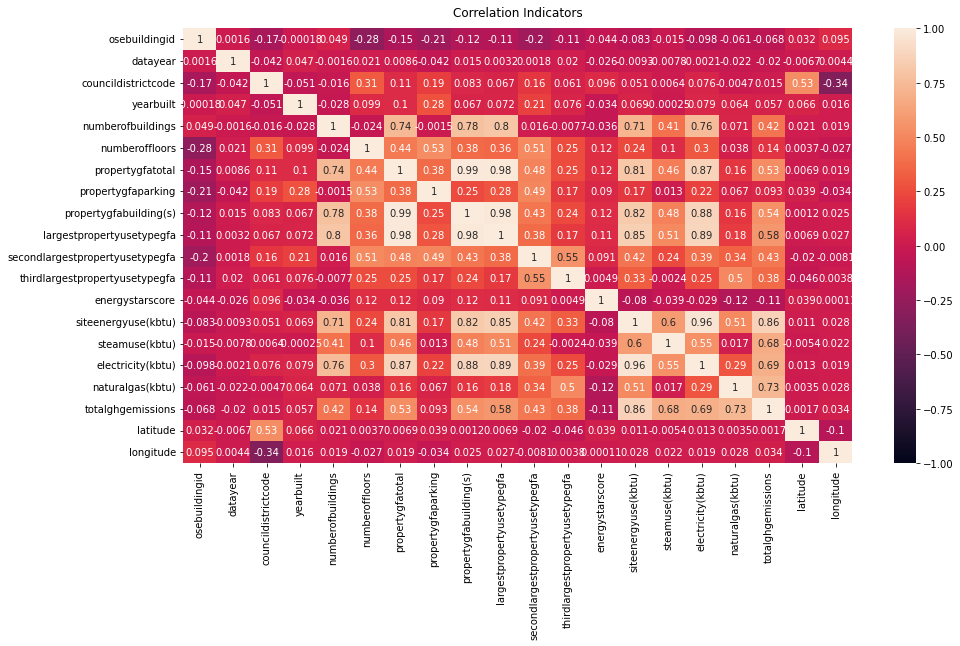

In [1465]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data[cols_num].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12)

In [1466]:
corr = data[cols_num].corr()
threshold = 0.75
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
26,propertygfabuilding(s),propertygfatotal,0.989782
24,largestpropertyusetypegfa,propertygfabuilding(s),0.981573
22,propertygfatotal,largestpropertyusetypegfa,0.977715
20,siteenergyuse(kbtu),electricity(kbtu),0.956073
18,largestpropertyusetypegfa,electricity(kbtu),0.888775
16,electricity(kbtu),propertygfabuilding(s),0.876919
14,electricity(kbtu),propertygfatotal,0.867959
12,totalghgemissions,siteenergyuse(kbtu),0.862248
10,largestpropertyusetypegfa,siteenergyuse(kbtu),0.845945
8,siteenergyuse(kbtu),propertygfabuilding(s),0.822542


In [1467]:
# focus sur les correlation avec nos variables target energie
corr_energy = pd.DataFrame(corr['siteenergyuse(kbtu)'])
corr_energy.sort_values(by='siteenergyuse(kbtu)', ascending=False)

,siteenergyuse(kbtu)
siteenergyuse(kbtu),1.000000
electricity(kbtu),0.956073
totalghgemissions,0.862248
largestpropertyusetypegfa,0.845945
propertygfabuilding(s),0.822542
propertygfatotal,0.809394
numberofbuildings,0.712278
steamuse(kbtu),0.600750
naturalgas(kbtu),0.513175
secondlargestpropertyusetypegfa,0.416768


In [1468]:
# focus sur les correlation avec nos variables target emission CO2
corr_emission = pd.DataFrame(corr['totalghgemissions'])
corr_emission.sort_values(by='totalghgemissions', ascending=False)

,totalghgemissions
totalghgemissions,1.000000
siteenergyuse(kbtu),0.862248
naturalgas(kbtu),0.731851
electricity(kbtu),0.689265
steamuse(kbtu),0.677115
largestpropertyusetypegfa,0.577978
propertygfabuilding(s),0.541800
propertygfatotal,0.530428
secondlargestpropertyusetypegfa,0.432961
numberofbuildings,0.419861


## complément nettoyage et creation de nouvelles variables

In [1469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 204 to 3375
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   osebuildingid                    1679 non-null   int64  
 1   datayear                         1679 non-null   int64  
 2   buildingtype                     1679 non-null   object 
 3   primarypropertytype              1679 non-null   object 
 4   councildistrictcode              1679 non-null   int64  
 5   neighborhood                     1679 non-null   object 
 6   yearbuilt                        1679 non-null   int64  
 7   numberofbuildings                1679 non-null   float64
 8   numberoffloors                   1679 non-null   float64
 9   propertygfatotal                 1679 non-null   int64  
 10  propertygfaparking               1679 non-null   int64  
 11  propertygfabuilding(s)           1679 non-null   int64  
 12  listofallpropertyu

In [1470]:
# drop datayear et yearbuilt remplacés par age 
data.drop(['datayear','yearbuilt'],axis=1,inplace=True)

In [1471]:
# propertygfatotal, propertygfaparking  et propertygfabuilding(s)
# la corrélation avec propertygfatotal est forte  --> nous choisissons de creer 
# propertygfaparking =% de propertygfatotal  ET garder propertygfabuilding(s) pour le moment

In [1472]:
data['taux_parking_gfa']=data['propertygfaparking']/data['propertygfatotal']

In [1473]:
data.drop(['propertygfaparking'],axis=1,inplace=True)

In [1474]:
# changement de la variable listofallpropertyusetypes

In [1475]:
data['nombre_utilisation'] = [len(str(row).split(','))
                             for row in data['listofallpropertyusetypes']]


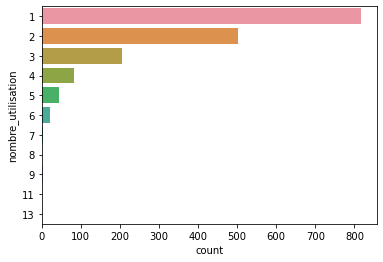

In [1476]:
ax = sns.countplot(y='nombre_utilisation', data=data)

In [1477]:
data.drop('listofallpropertyusetypes', axis=1, inplace=True)

In [1478]:
# variables 'largestpropertyusetypegfa', 'secondlargestpropertyusetypegfa', 'thirdlargestpropertyusetypegfa
# ces variables sont corrélées --> les remplacer en pourcentage du total

In [1479]:
data['taux-largest_gfa'] = data['largestpropertyusetypegfa'] / data['propertygfatotal']
data['taux_second_gfa'] = data['secondlargestpropertyusetypegfa'] / data['propertygfatotal']
data['taux_third_gfa'] = data['thirdlargestpropertyusetypegfa'] / data['propertygfatotal']

In [1480]:
data.drop(['largestpropertyusetypegfa','secondlargestpropertyusetypegfa','thirdlargestpropertyusetypegfa'],axis=1,inplace=True)

In [1481]:
# supprimer propertygfatotal et conserver propertygfabuilding(s)
data.drop(['propertygfatotal'],axis=1,inplace=True)

In [1482]:
# normaliser la variable propertygfabuilding

In [1483]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log10, inverse_func = np.exp, check_inverse = True)
log_propertygfabuilding = logtransformer.transform(data['propertygfabuilding(s)'])
log_propertygfabuilding=pd.DataFrame(log_propertygfabuilding)
log_propertygfabuilding.columns

Index(['propertygfabuilding(s)'], dtype='object')

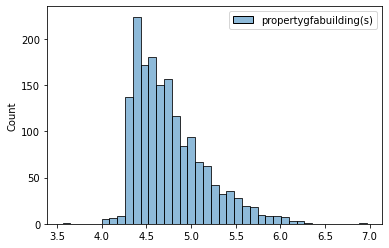

In [1484]:
sns.histplot(data=log_propertygfabuilding)
plt.show()

In [1485]:
data['log_propertygfabuilding']=np.log10(1+data['propertygfabuilding(s)'])
data.drop(['propertygfabuilding(s)'],axis=1,inplace=True)

In [1486]:
#les variables  electricity(kbtu), naturalgas(kbtu) et steamuse(kbtu) présentent une importante corrélation avec la source 
#d'energie (variables target)--> ce sont les quantité par type d'energie...
#éliminons l'information 

In [1487]:
data.drop(['electricity(kbtu)','naturalgas(kbtu)','steamuse(kbtu)'],axis=1,inplace=True) 

In [1488]:
#supprimer defaultdata et compliancestatus
data.drop(['compliancestatus','defaultdata'],axis=1,inplace=True)

In [1489]:
#créer une seule variable unique pour latitude et longitude 
data['lat'] = pd.cut(data['latitude'],bins=10)
data['long'] = pd.cut(data['longitude'],bins=10)
data['lat_long'] = data['lat'].astype(str) + data['long'].astype(str)

In [1490]:
data.drop(['lat','long','latitude','longitude'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation Indicators')

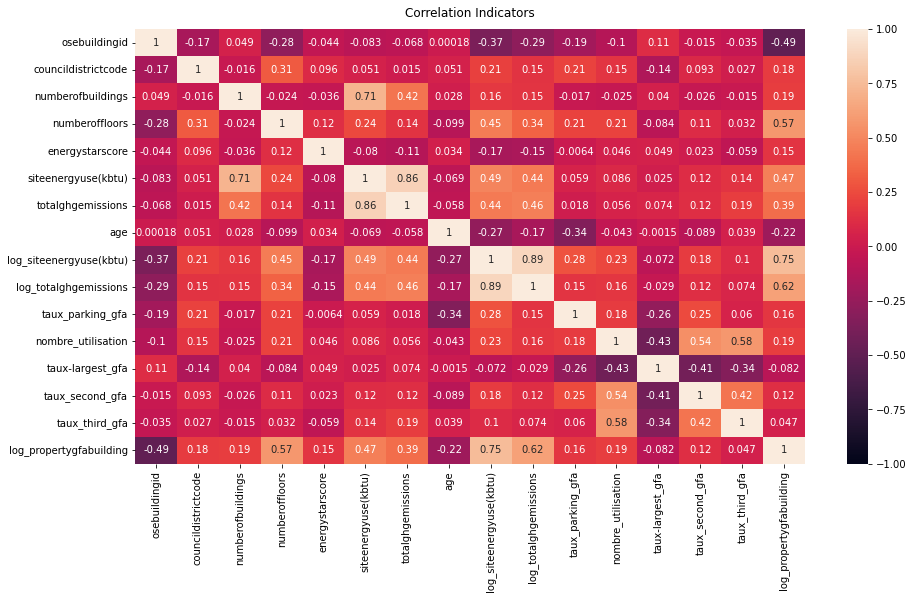

In [1491]:
# verif colinearité
cols_num=data.select_dtypes(include=np.number).columns.to_list()
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data[cols_num].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12)

In [1492]:
corr = data[cols_num].corr()
threshold = 0.75
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
4,log_totalghgemissions,log_siteenergyuse(kbtu),0.890460
2,totalghgemissions,siteenergyuse(kbtu),0.862248
0,log_siteenergyuse(kbtu),log_propertygfabuilding,0.752099


<AxesSubplot:>

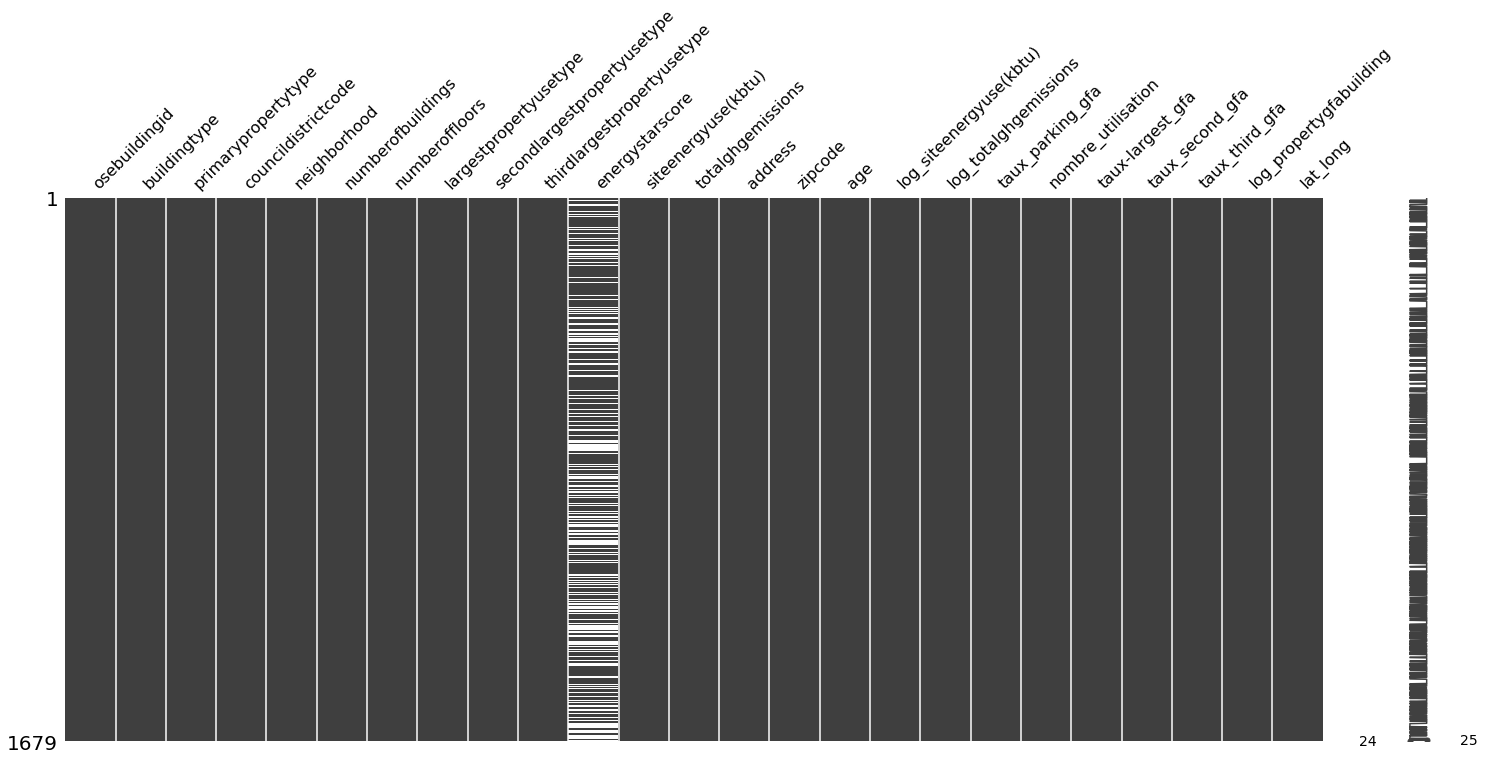

In [1493]:
msno.matrix(data)

## Exporter data set

In [1494]:
data.to_csv('data_clean.csv')